# Questão 1A

In [119]:
import requests
import pandas as pd
import json

camara_base_url = 'https://dadosabertos.camara.leg.br/api/v2/'

def get_deputados():
    url = f'{camara_base_url}/deputados?dataInicio=2024-08-01&dataFim=2024-08-30&ordem=ASC&ordenarPor=nome'
    response = requests.get(url)
    if not response.ok: # != 200:
        raise Exception('Nao foi possivel recuperar os dados')

    df_deputados = pd.DataFrame().from_dict(json.loads(response.text)['dados'])
    df_deputados.to_parquet('../data/deputados.parquet')
    
    return df_deputados

df_deputados = get_deputados()

In [120]:
df_deputados.shape

(519, 9)

In [33]:
unique_ids = df_deputados['id'].nunique()
total_ids = len(df_deputados)
print(f"Deputados únicos: {unique_ids}, Total de registros: {total_ids}")


Deputados únicos: 517, Total de registros: 519


In [32]:
# Verifique valores únicos de idLegislatura
print(df_deputados['idLegislatura'].unique())

# Filtre apenas pela legislatura atual (exemplo: 57)
df_deputados = df_deputados[df_deputados['idLegislatura'] == 57]


[57]


In [48]:
# drop duplicates
df_deputados.drop_duplicates()

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
2,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
3,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
4,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br
...,...,...,...,...,...,...,...,...,...
514,220558,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Trovão,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SC,57,https://www.camara.leg.br/internet/deputado/ba...,dep.zetrovao@camara.leg.br
515,204517,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Vitor,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MG,57,https://www.camara.leg.br/internet/deputado/ba...,dep.zevitor@camara.leg.br
516,160592,https://dadosabertos.camara.leg.br/api/v2/depu...,Zeca Dirceu,PT,https://dadosabertos.camara.leg.br/api/v2/part...,PR,57,https://www.camara.leg.br/internet/deputado/ba...,dep.zecadirceu@camara.leg.br
517,220592,https://dadosabertos.camara.leg.br/api/v2/depu...,Zezinho Barbary,PP,https://dadosabertos.camara.leg.br/api/v2/part...,AC,57,https://www.camara.leg.br/internet/deputado/ba...,dep.zezinhobarbary@camara.leg.br


In [49]:
df_deputados.shape

(519, 9)

In [37]:
display(df_deputados.head())


,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
2,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
3,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
4,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br


In [30]:
df_deputados.columns

Index(['id', 'uri', 'nome', 'siglaPartido', 'uriPartido', 'siglaUf',
       'idLegislatura', 'urlFoto', 'email'],
      dtype='object')

In [28]:
unique_ids = df_deputados['id'].nunique()
print(f"Deputados únicos pelo ID: {unique_ids}")


Deputados únicos pelo ID: 517


In [29]:
df_deputados = df_deputados[df_deputados['situacao'] == 'Exercício']


KeyError: 'situacao'

# Questão 3B

In [ ]:
prompt_start = """
    You are a Python programmer with expertise in data analysis and visualization. 
    Your task is to create a Python script that performs the following actions:
    
    Important:
    - The local of parquet file is '../data/deputados.parquet'

    1. Load a dataset stored in a Parquet file located at '../data/deputados.parquet'. The dataset contains the following columns:
    ['id', 'uri', 'nome', 'siglaPartido', 'uriPartido', 'siglaUf', 'idLegislatura', 'urlFoto', 'email'].

    2. Use the column 'siglaPartido' to calculate:
    - The total number of deputies (rows) for each political party.
    - The percentage representation of each party.

    3. Create a pie chart to visualize this distribution:
    - The pie chart should display each party as a slice.
    - Each slice should show both the total count and percentage of deputies for the corresponding party.

    4. Save the pie chart as an image file in the directory '../docs' with the filename 'distribuicao_deputados.png'.

    Use pandas for data manipulation and matplotlib for visualization. Ensure the script is clear and well-commented, making it easy to understand for other programmers.

    Provide the complete Python code that accomplishes this.

    """

import pandas as pd
import json
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_parquet('../data/deputados.parquet')

# Calculate party distribution
party_counts = df['siglaPartido'].value_counts()
total_deputies = len(df)
party_percentages = (party_counts / total_deputies) * 100

# Create JSON data
distribution_data = []
for party, count in party_counts.items():
    distribution_data.append({
        "party": party,
        "total_deputies": int(count),  # Ensure integer type
        "percentage": float(party_percentages[party]) # Ensure float type
    })

# Save JSON data
with open('../data/distribuicao_deputados.json', 'w') as f:
    json.dump(distribution_data, f, indent=4)

# Generate pie chart
with open('../data/distribuicao_deputados.json', 'r') as f:
    data = json.loads(f.read())

labels = [f"{item['party']} ({item['total_deputies']} - {item['percentage']:.2f}%)" for item in data]
sizes = [item['total_deputies'] for item in data]

fig, ax = plt.subplots(figsi

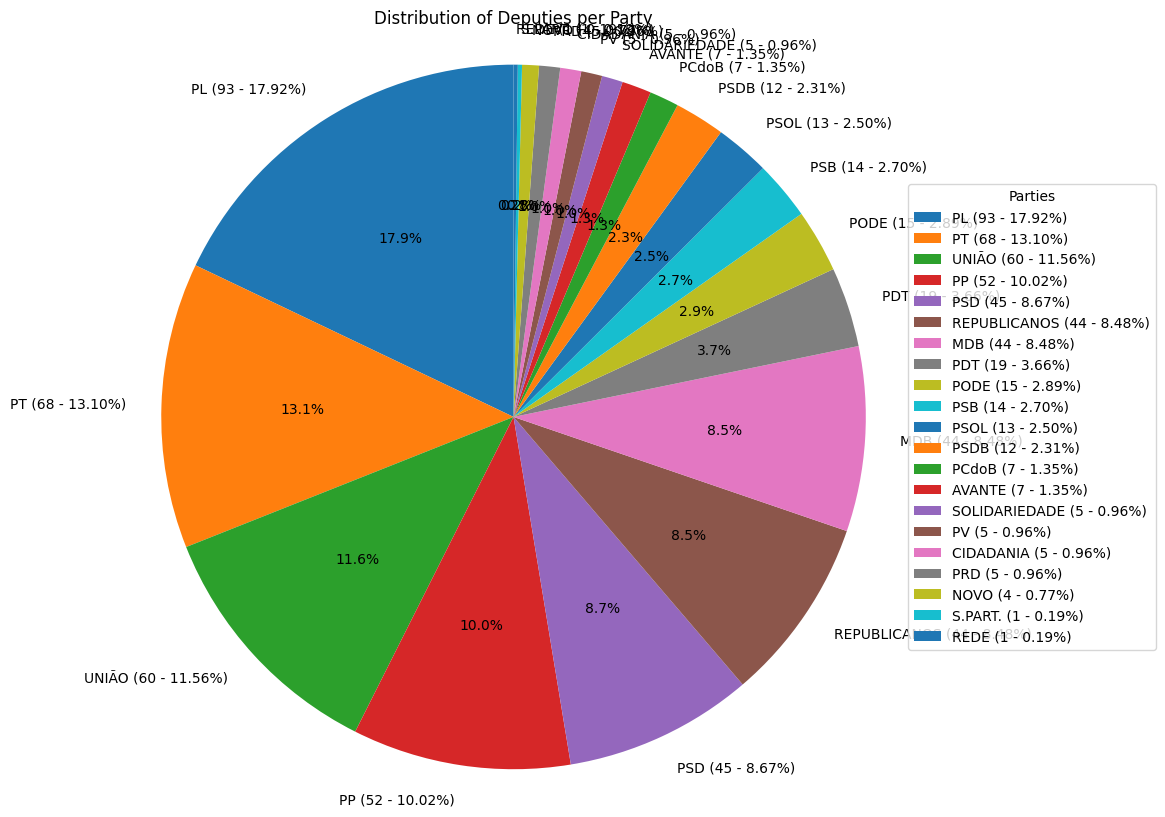

In [74]:
import os
import google.generativeai as genai
from dotenv import load_dotenv
import pandas as pd
import json

load_dotenv('../.env')

def create_pizza_chart():
    prompt_start = """
    You are a Python programmer with expertise in data analysis. Your task is to create a Python script that performs the following actions:

    1. Load a dataset stored in a Parquet file located at '../data/deputados.parquet'. The dataset contains the following columns:
    ['id', 'uri', 'nome', 'siglaPartido', 'uriPartido', 'siglaUf', 'idLegislatura', 'urlFoto', 'email'].

    2. Use the column 'siglaPartido' to calculate:
    - The total number of deputies (rows) for each political party.
    - The percentage representation of each party.

    3. Save this information as a JSON file in the directory '../data' with the filename 'distribuicao_deputados.json'. 
    - The JSON should have the structure:
        [
            {
                "party": "Party Name",
                "total_deputies": TotalNumber,
                "percentage": PercentageValue
            }
        ]

    4. Use the JSON file to generate a pie chart that displays the distribution of deputies per party.
    - Use json.loads() to parse the JSON data.
    - The pie chart should display each party as a slice.
    - Each slice should show both the total count and percentage of deputies for the corresponding party.
    - Add a title, labels, and a legend to the plot.
    - Save the pie chart as an image file in the directory '../docs' with the filename 'distribuicao_deputados.png'.

    Output only the code, no need for explanations.
    """

    genai.configure(api_key=os.environ["GEMINI_KEY"])
    model = genai.GenerativeModel("gemini-1.5-pro")
    response = model.generate_content(prompt_start)
    analysis_code = response.text.replace("```python\n", '').replace("\n```", '')
    exec(analysis_code)
    return analysis_code

analysis_code = create_pizza_chart()
print(analysis_code)


In [ ]:
import os
import google.generativeai as genai
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt

load_dotenv('../.env')

def create_pizza_chart():
    prompt_json = """
    You are a Python programmer with expertise in data analysis. Your task is to create a Python script that performs the following actions:

    1. Load a dataset stored in a Parquet file located at '../data/deputados.parquet'. The dataset contains the following columns:
    ['id', 'uri', 'nome', 'siglaPartido', 'uriPartido', 'siglaUf', 'idLegislatura', 'urlFoto', 'email'].
    Note: The file uses `;` as the column separator.

    2. Use the column 'siglaPartido' to calculate:
    - The total number of deputies (rows) for each political party.
    - The percentage representation of each party.

    3. Save this information as a JSON file in the directory '../data' with the filename 'distribuicao_deputados.json'. 
    - The JSON should have the structure:
        [
            {{
                "party": "Party Name",
                "total_deputies": TotalNumber,
                "percentage": PercentageValue
            }}
        ]
    Output only the JSON FILE, no need for explanations.
    """

    genai.configure(api_key=os.environ["GEMINI_KEY"])
    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content(prompt_json)
    data_json = json.loads(response.text.replace("```json\n",'').replace("\n```",''))
    return data_json

data_json = create_pizza_chart()
print(data_json)


In [72]:
data_json

[{'party': 'PT', 'total_deputies': 64, 'percentage': 20.0},
 {'party': 'PL', 'total_deputies': 63, 'percentage': 19.6875},
 {'party': 'PP', 'total_deputies': 47, 'percentage': 14.6875},
 {'party': 'PSD', 'total_deputies': 46, 'percentage': 14.375},
 {'party': 'MDB', 'total_deputies': 42, 'percentage': 13.125},
 {'party': 'PDT', 'total_deputies': 21, 'percentage': 6.5625},
 {'party': 'PSDB', 'total_deputies': 19, 'percentage': 5.9375},
 {'party': 'PSOL', 'total_deputies': 13, 'percentage': 4.0625},
 {'party': 'Republicanos', 'total_deputies': 11, 'percentage': 3.4375},
 {'party': ' União Brasil', 'total_deputies': 10, 'percentage': 3.125},
 {'party': 'Cidadania', 'total_deputies': 9, 'percentage': 2.8125},
 {'party': 'PSC', 'total_deputies': 8, 'percentage': 2.5},
 {'party': 'Avante', 'total_deputies': 7, 'percentage': 2.1875},
 {'party': 'Solidariedade', 'total_deputies': 6, 'percentage': 1.875},
 {'party': 'PV', 'total_deputies': 6, 'percentage': 1.875},
 {'party': 'PODE', 'total_depu

In [61]:
df = pd.read_parquet('../data/deputados.parquet')

# Questão 3C

In [84]:
import json
import yaml

with open('../data/config.yaml', 'r') as f:
    config = yaml.safe_load(f)['overview_summary']

config

'A CÃ¢mara dos Deputados Ã© uma das duas casas que compÃµem o Congresso Nacional, o Poder Legislativo do Brasil. Ela representa a populaÃ§Ã£o brasileira, sendo seus membros eleitos pelo voto proporcional em cada estado e no Distrito Federal. A quantidade de deputados por estado varia conforme o tamanho da sua populaÃ§Ã£o, garantindo que estados mais populosos tenham maior representatividade. A principal funÃ§Ã£o da CÃ¢mara Ã© elaborar e votar leis que afetam o paÃ\xads como um todo, alÃ©m de fiscalizar o Poder Executivo e exercer outras atribuiÃ§Ãµes previstas na ConstituiÃ§Ã£o Federal. Os deputados federais tÃªm mandato de quatro anos e podem ser reeleitos indefinidamente.\n\nEm resumo, a CÃ¢mara dos Deputados funciona como a voz do povo brasileiro no cenÃ¡rio polÃ\xadtico nacional. Seus membros, os deputados federais, sÃ£o responsÃ¡veis por discutir e aprovar leis que impactam diretamente a vida dos cidadÃ£os, desde questÃµes econÃ´micas e sociais atÃ© temas relacionados Ã\xa0 saÃºde

In [115]:
import os
import google.generativeai as genai
from dotenv import load_dotenv
import pandas as pd
import yaml
import json

load_dotenv('../.env')

def generate_insights_about_chamber_of_deputies():
    
    with open('../data/config.yaml', 'r') as f:
        config = yaml.safe_load(f)['overview_summary']
        
    with open('../data/distribuicao_deputados.json', 'r') as f:
        data_json = json.load(f)

    # Escapar as chaves no f-string
    prompt_start = f"""
        You are a political analyst specializing in legislative systems. Your task is to analyze the distribution of deputies among political parties in the Brazilian Chamber of Deputies based on the following data:

        JSON data:
        {data_json}

        Additionally, consider the following summary of the Chamber's role:
        {config}

        Using this information:
        1. Identify trends in the distribution of deputies across parties.
        2. Analyze the implications of party dominance on legislative negotiations.
        3. Explain how the presence of smaller parties affects coalition building and power balance.
        4. Provide your insights in the format:
        - "Key Insight: [brief description of the insight]"
        - "Explanation: [detailed explanation of the insight]"

        Generate a structured output in JSON format, where each insight includes:
        {{
        "insights": [
            {{
                "topic": "Dominance of Major Parties",
                "analysis": "Key Insight: The PL dominates the Chamber with 17.9% of the deputies. This gives them a significant advantage in legislative negotiations."
            }},
            {{
                "topic": "Influence of Small Parties",
                "analysis": "Key Insight: Smaller parties, like Rede and S.Part., hold marginal influence. However, they can act as tie-breakers in close votes."
            }}
        ]
        }}
        Output only the JSON file, no need for explanations.
    """

    genai.configure(api_key=os.environ["GEMINI_KEY"])
    model = genai.GenerativeModel("gemini-1.5-pro")
    response = model.generate_content(prompt_start)
    dict_insights = json.loads(response.text.replace("```json\n",'').replace("\n```",''))
    try:
        with open('../data/insights_distribuicao_deputados.json', 'w') as f:
            json.dump(dict_insights, f)
    except Exception as e:
        print(e)
    return dict_insights

insights = generate_insights_about_chamber_of_deputies()
print(insights)


{'insights': [{'topic': 'Dominance of Major Parties', 'analysis': 'Key Insight: The PL holds the largest share of seats (17.9%), but lacks an outright majority. This necessitates coalition building for passing legislation.'}, {'topic': 'Multi-Party System and Coalition Building', 'analysis': 'Key Insight: The presence of numerous parties with varying seat shares (PL, PT, UNIÃO, PP, PSD, etc.) creates a fragmented political landscape, requiring alliances for legislative effectiveness.'}, {'topic': 'Influence of Mid-Sized Parties', 'analysis': 'Key Insight: Mid-sized parties like PSD, REPUBLICANOS, and MDB (8-10% each) hold significant sway.  Their support is crucial for forming majority coalitions and influencing policy directions.'}, {'topic': 'Negotiation and Compromise in a Fragmented System', 'analysis': 'Key Insight: The distribution necessitates negotiation and compromise among parties to advance legislative agendas.  The diversity of party ideologies can lead to complex policy de

In [116]:
insigts

[{'topic': 'Dominance of Major Parties',
  'analysis': 'Key Insight: The PL holds a plurality, not a majority, with 17.9% of deputies. While this provides leverage, it necessitates coalition building for passing legislation.'},
 {'topic': 'Impact on Legislative Negotiations',
  'analysis': 'Key Insight: The distribution suggests a fragmented political landscape. The lack of a single majority party will likely lead to extensive negotiations and compromises to pass legislation.  The top three parties (PL, PT, and UNIÃO) control just under 42% of the Chamber, far from a majority.'},
 {'topic': 'Influence of Small Parties',
  'analysis': 'Key Insight:  While individually weak, smaller parties can collectively exert influence. They become crucial for forming majority coalitions, potentially wielding disproportionate power in exchange for their support.'},
 {'topic': 'Coalition Building and Power Balance',
  'analysis': 'Key Insight: The fragmented nature of the chamber incentivizes coalitio

In [117]:
insigts = insights['insights']
for insight in insigts:
    print('Tópico:', insight['topic'])
    print('Análise:', insight['analysis'])
    print()

Tópico: Dominance of Major Parties
Análise: Key Insight: The PL holds the largest share of seats (17.9%), but lacks an outright majority. This necessitates coalition building for passing legislation.

Tópico: Multi-Party System and Coalition Building
Análise: Key Insight: The presence of numerous parties with varying seat shares (PL, PT, UNIÃO, PP, PSD, etc.) creates a fragmented political landscape, requiring alliances for legislative effectiveness.

Tópico: Influence of Mid-Sized Parties
Análise: Key Insight: Mid-sized parties like PSD, REPUBLICANOS, and MDB (8-10% each) hold significant sway.  Their support is crucial for forming majority coalitions and influencing policy directions.

Tópico: Negotiation and Compromise in a Fragmented System
Análise: Key Insight: The distribution necessitates negotiation and compromise among parties to advance legislative agendas.  The diversity of party ideologies can lead to complex policy debates and outcomes.

Tópico: Role of Smaller Parties
Aná

In [104]:
type(insights)

dict

In [ ]:
dict_insights = 
dict_insights

{'insights': [{'topic': 'Dominance of Major Parties',
   'analysis': 'Key Insight: The PL holds a plurality, not a majority, in the Chamber with 17.9% of the deputies. While this gives them significant influence, they still require coalition-building for legislative success.'},
  {'topic': 'Legislative Negotiations and Coalition Building',
   'analysis': 'Key Insight: The distribution suggests a fragmented political landscape. The lack of a majority party necessitates coalitions between larger parties like PL, PT, and UNIÃO with smaller parties to achieve a legislative majority.'},
  {'topic': 'Influence of Small Parties',
   'analysis': 'Key Insight: While individually small, collectively the numerous parties below 5% hold considerable power.  Their support becomes crucial for larger parties seeking to form governing coalitions and pass legislation.'},
  {'topic': 'Power Balance and Coalition Stability',
   'analysis': 'Key Insight:  The fragmented nature of the Chamber, with several 

In [ ]:
prompt_start = """
    You are a Python programmer with expertise in data analysis. Your task is to create a Python script that performs the following actions:

    1. Load a dataset stored in a Parquet file located at '../data/deputados.parquet'. The dataset contains the following columns:
    ['id', 'uri', 'nome', 'siglaPartido', 'uriPartido', 'siglaUf', 'idLegislatura', 'urlFoto', 'email'].

    2. Use the column 'siglaPartido' to calculate:
    - The total number of deputies (rows) for each political party.
    - The percentage representation of each party.

    3. Save this information as a JSON file in the directory '../data' with the filename 'distribuicao_deputados.json'. 
    - The JSON should have the structure:
        [
            {
                "party": "Party Name",
                "total_deputies": TotalNumber,
                "percentage": PercentageValue
            }
        ]

    4. Use the JSON file to generate a pie chart that displays the distribution of deputies per party.
    - Use json.loads() to parse the JSON data.
    - The pie chart should display each party as a slice.
    - Each slice should show both the total count and percentage of deputies for the corresponding party.
    - Add a title, labels, and a legend to the plot.
    - Save the pie chart as an image file in the directory '../docs' with the filename 'distribuicao_deputados.png'.

    Output only the code, no need for explanations.
    """

# Questão 4A

In [ ]:
import requests
import pandas as pd
import json

camara_base_url = 'https://dadosabertos.camara.leg.br/api/v2/'

def get_deputados():
    url = f'{camara_base_url}/deputados?dataInicio=2024-08-01&dataFim=2024-08-30&ordem=ASC&ordenarPor=nome'
    response = requests.get(url)
    if not response.ok: # != 200:
        raise Exception('Nao foi possivel recuperar os dados')

    df_deputados = pd.DataFrame().from_dict(json.loads(response.text)['dados'])
    df_deputados.to_parquet('../data/deputados.parquet')
    
    return df_deputados

df_deputados = get_deputados()

In [121]:
df_deputados

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
2,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
3,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
4,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br
...,...,...,...,...,...,...,...,...,...
514,220558,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Trovão,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SC,57,https://www.camara.leg.br/internet/deputado/ba...,dep.zetrovao@camara.leg.br
515,204517,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Vitor,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MG,57,https://www.camara.leg.br/internet/deputado/ba...,dep.zevitor@camara.leg.br
516,160592,https://dadosabertos.camara.leg.br/api/v2/depu...,Zeca Dirceu,PT,https://dadosabertos.camara.leg.br/api/v2/part...,PR,57,https://www.camara.leg.br/internet/deputado/ba...,dep.zecadirceu@camara.leg.br
517,220592,https://dadosabertos.camara.leg.br/api/v2/depu...,Zezinho Barbary,PP,https://dadosabertos.camara.leg.br/api/v2/part...,AC,57,https://www.camara.leg.br/internet/deputado/ba...,dep.zezinhobarbary@camara.leg.br


In [ ]:
import requests
import pandas as pd
import json

camara_base_url = 'https://dadosabertos.camara.leg.br/api/v2/'

def get_deputados():
    url = f'{camara_base_url}/deputados/220593/despesas'
    response = requests.get(url)
    if not response.ok: # != 200:
        raise Exception('Nao foi possivel recuperar os dados')

    df_deputados_despesas = pd.DataFrame().from_dict(json.loads(response.text)['dados'])
    df_deputados_despesas.to_parquet('../data/deputados.parquet')
    
    return df_deputados_despesas

df_deputados_despesas = get_deputados()


In [127]:
df_deputados_despesas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ano                15 non-null     int64  
 1   mes                15 non-null     int64  
 2   tipoDespesa        15 non-null     object 
 3   codDocumento       15 non-null     int64  
 4   tipoDocumento      15 non-null     object 
 5   codTipoDocumento   15 non-null     int64  
 6   dataDocumento      15 non-null     object 
 7   numDocumento       15 non-null     object 
 8   valorDocumento     15 non-null     float64
 9   urlDocumento       15 non-null     object 
 10  nomeFornecedor     15 non-null     object 
 11  cnpjCpfFornecedor  15 non-null     object 
 12  valorLiquido       15 non-null     float64
 13  valorGlosa         15 non-null     float64
 14  numRessarcimento   15 non-null     object 
 15  codLote            15 non-null     int64  
 16  parcela            15 non-nu

In [134]:
df_deputados['id'].unique()[0:10]

array([220593, 204379, 220714, 221328, 204560, 204528, 121948,  74646,
       136811, 178835], dtype=int64)

In [152]:
import requests
import pandas as pd
import os

def processar_despesas(url_base, ids_deputados, ano, mes):
    """
    Coleta as informações das despesas dos deputados e salva em formato Parquet.
    
    Args:
        url_base (str): URL base da API.
        ids_deputados (list): Lista de IDs dos deputados.
        ano (int): Ano de referência.
        mes (int): Mês de referência.
    """
    despesas_completas = []
    headers = {
        "Accept": "application/json",
        "User-Agent": "Mozilla/5.0 (compatible; SeuApp/1.0)"
    }
    
    for id_deputado in ids_deputados:
        page = 1
        while True:
            url = (f"{url_base}/deputados/{id_deputado}/despesas"
                   f"?ano={ano}&mes={mes}&ordem=ASC&ordenarPor=ano"
                   f"&pagina={page}&itens=100")  # Ajuste 'itens' conforme necessário
            response = requests.get(url, headers=headers)
            
            if response.status_code == 200:
                dados = response.json()
                despesas = pd.DataFrame(dados.get("dados", []))
                
                if despesas.empty:
                    break  # Sem mais dados
                
                despesas["idDeputado"] = id_deputado
                despesas_completas.append(despesas)
                
                # Verificar se há mais páginas
                links = dados.get("links", [])
                if not any(link.get("rel") == "next" for link in links):
                    break  # Não há próxima página
                page += 1
            else:
                print(f"Falha ao obter dados para o deputado {id_deputado}. Status: {response.status_code}")
                break  # Pular para o próximo deputado
    
    if despesas_completas:
        # Concatenar todas as despesas
        df_despesas = pd.concat(despesas_completas, ignore_index=True)
        
        # Converter a data do documento para formato datetime
        df_despesas["dataDocumento"] = pd.to_datetime(df_despesas["dataDocumento"], errors='coerce')
        
        # Remover entradas com datas inválidas
        df_despesas = df_despesas.dropna(subset=["dataDocumento"])
        
        # Agrupar por dia, deputado e tipo de despesa
        despesas_agrupadas = df_despesas.groupby(
            [df_despesas["dataDocumento"].dt.date, "idDeputado", "tipoDespesa"]
        ).agg({
            "valorDocumento": "sum",
            "valorLiquido": "sum",
            "valorGlosa": "sum"
        }).reset_index()
        
        # Renomear as colunas
        despesas_agrupadas.rename(columns={
            "dataDocumento": "dia",
            "idDeputado": "deputado",
            "tipoDespesa": "tipo_despesa"
        }, inplace=True)
        
        # Salvar em arquivo Parquet
        output_path = "data/serie_despesas_diarias_deputados.parquet"
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        despesas_agrupadas.to_parquet(output_path, index=False)
        print(f"Arquivo salvo em {output_path}")
    else:
        print("Nenhuma despesa foi processada.")

# Exemplo de uso
if __name__ == "__main__":
    # Supondo que você tenha um DataFrame 'df_deputados' com uma coluna 'id'
    # Por exemplo:
    # df_deputados = pd.read_csv("caminho_para_seu_csv_deputados.csv")
    ids_deputados = df_deputados['id'].unique()[0:2]
    
    url_base = "https://dadosabertos.camara.leg.br/api/v2"
    ano, mes = 2024, 8  # Período de exemplo
    
    processar_despesas(url_base, ids_deputados, ano, mes)

Arquivo salvo em data/serie_despesas_diarias_deputados.parquet


In [ ]:
despesas_completas = []
headers = {
    "Accept": "application/json",
    "User-Agent": "Mozilla/5.0 (compatible; SeuApp/1.0)"
}
ids_deputados = df_deputados['id'].unique()[0:2]
for id_deputado in ids_deputados:
    page = 1
    while True:
        url = (f"{url_base}/deputados/{id_deputado}/despesas"
                f"?ano={ano}&mes={mes}&ordem=ASC&ordenarPor=ano"
                f"&pagina={page}&itens=100")  # Ajuste 'itens' conforme necessário
        response = requests.get(url, headers=headers)
        
        if response.status_code == 200:
            dados = response.json()
            despesas = pd.DataFrame(dados.get("dados", []))
            
            if despesas.empty:
                break  # Sem mais dados
            
            despesas["idDeputado"] = id_deputado
            despesas_completas.append(despesas)
            
            # Verificar se há mais páginas
            links = dados.get("links", [])
            if not any(link.get("rel") == "next" for link in links):
                break  # Não há próxima página
            page += 1
        else:
            print(f"Falha ao obter dados para o deputado {id_deputado}. Status: {response.status_code}")
            break  # Pular para o próximo deputado

if despesas_completas:
        # Concatenar todas as despesas
        df_despesas = pd.concat(despesas_completas, ignore_index=True)
        
        # Converter a data do documento para formato datetime
        df_despesas["dataDocumento"] = pd.to_datetime(df_despesas["dataDocumento"], errors='coerce')
        
        # Remover entradas com datas inválidas
        df_despesas = df_despesas.dropna(subset=["dataDocumento"])
        
        despesas_agrupadas = df_despesas.groupby(
            [df_despesas["dataDocumento"].dt.date, "idDeputado", "tipoDespesa"]
        ).agg({
            "valorDocumento": "sum",
            "valorLiquido": "sum",
            "valorGlosa": "sum"
        }).reset_index()

In [149]:
df_despesas.head()

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,idDeputado
0,2024,8,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7797837,Recibos/Outros,1,2024-08-21,216756,149.90,https://www.camara.leg.br/cota-parlamentar/doc...,BRASIL ADM E SERVIÇOS DE COBRANÇA,33488393000183,149.90,0.00,,2071363,0,220593
1,2024,8,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7790009,Nota Fiscal,0,2024-08-20,732,1050.00,https://www.camara.leg.br/cota-parlamentar/doc...,BROAD BRASIL LTDA,48949641000113,1050.00,0.00,,2067233,0,220593
2,2024,8,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7797346,Recibos/Outros,1,2024-08-16,625384,659.77,https://www.camara.leg.br/cota-parlamentar/doc...,CONDOMÍNIO EDÍFICIL COMERCIAL CONCORDE,24311808000158,633.20,26.57,,2071081,0,220593
3,2024,8,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7801647,Nota Fiscal,0,2024-08-13,032633544,322.62,https://www.camara.leg.br/cota-parlamentar/doc...,ENERGISA MATO GROSSO - DISTRIBUIDORA DE ENERGI...,03467321000199,315.34,7.28,,2073315,0,220593
4,2024,8,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7782134,Nota Fiscal,0,2024-08-02,10298668,336.00,https://www.camara.leg.br/cota-parlamentar/doc...,Google Cloud Brasil Computação e Serviços de D...,25012398000107,336.00,0.00,,2063396,0,220593


In [151]:
despesas_agrupadas = df_despesas.groupby(
            [df_despesas["dataDocumento"].dt.date, "idDeputado", "tipoDespesa"]
        ).agg({
            "valorDocumento": "sum",
            "valorLiquido": "sum",
            "valorGlosa": "sum"
        }).reset_index()
despesas_agrupadas

,dataDocumento,idDeputado,tipoDespesa,valorDocumento,valorLiquido,valorGlosa
0,2024-08-01,204379,COMBUSTÍVEIS E LUBRIFICANTES.,80.90,80.90,0.00
1,2024-08-01,220593,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7000.00,7000.00,0.00
2,2024-08-01,220593,PASSAGEM AÉREA - SIGEPA,-1830.79,-1830.79,0.00
3,2024-08-02,220593,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,336.00,336.00,0.00
4,2024-08-03,220593,COMBUSTÍVEIS E LUBRIFICANTES.,272.00,272.00,0.00
5,2024-08-04,220593,COMBUSTÍVEIS E LUBRIFICANTES.,195.46,195.46,0.00
6,2024-08-06,204379,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,750.00,750.00,0.00
7,2024-08-06,220593,COMBUSTÍVEIS E LUBRIFICANTES.,290.53,290.53,0.00
8,2024-08-06,220593,PASSAGEM AÉREA - SIGEPA,1151.76,1151.76,0.00
9,2024-08-07,204379,COMBUSTÍVEIS E LUBRIFICANTES.,291.55,291.55,0.00


In [142]:
pd.read_parquet('../data/serie_despesas_diarias_deputados.parquet')

,dia,deputado,tipo_despesa,valorDocumento,valorLiquido,valorGlosa
0,2024-07-01,74646,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,2781.36,2781.36,0.00
1,2024-07-23,220714,COMBUSTÍVEIS E LUBRIFICANTES.,220.00,220.00,0.00
2,2024-07-27,220714,COMBUSTÍVEIS E LUBRIFICANTES.,200.00,200.00,0.00
3,2024-08-01,121948,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,5000.00,5000.00,0.00
4,2024-08-01,136811,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,400.00,400.00,0.00
...,...,...,...,...,...,...
120,2024-08-31,220714,COMBUSTÍVEIS E LUBRIFICANTES.,199.49,199.49,0.00
121,2024-09-02,74646,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,1720.00,1720.00,0.00
122,2024-09-02,221328,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,5500.00,5500.00,0.00
123,2024-09-06,204560,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,5000.00,5000.00,0.00


In [176]:
num = df_deputados.id.nunique()
print(type(num))

<class 'int'>


In [177]:
def get_expenses_by_deputy(todos=False):
    if not todos:
        ids_deputados = df_deputados['id'].unique()[0:2]
    else:
        ids_deputados = df_deputados['id'].unique()
    list_expenses = []
    anoDespesa = '2024'
    maxItens = '100' # somente suporta ate 100
    mes = '08'
    for id in tqdm(ids_deputados):
        url = f'{camara_base_url}/deputados/{id}/despesas'
        params = {
            'ano': anoDespesa,
            'mes': mes,
            'itens': maxItens,
        }
        # Execucao da primeira pagina de resultados.
        response = requests.get(url, params)
        df_resp = pd.DataFrame().from_dict(json.loads(response.text)['dados'])
        df_resp['id'] = id
        list_expenses.append(df_resp)
        # Link para proxima pagina
        df_links = pd.DataFrame().from_dict(json.loads(response.text)['links'])
        df_links = df_links.set_index('rel').href
        
        while 'next' in df_links.index:
            response = requests.get(df_links['next'])
            df_resp = pd.DataFrame().from_dict(json.loads(response.text)['dados'])
            df_resp['id'] = id
            list_expenses.append(df_resp)
            # Link para proxima pagina
            df_links = pd.DataFrame().from_dict(json.loads(response.text)['links'])
            df_links = df_links.set_index('rel').href
            
    df_expenses = pd.concat(list_expenses)

    # Merge para trazer as informacoes de sigla e afins do deputado
    df_expenses = df_expenses.merge(df_deputados, on=['id'])

    df_expenses["dataDocumento"] = pd.to_datetime(df_despesas["dataDocumento"], errors='coerce')

    # Agrupar por dia, deputado e tipo de despesa
    df_expenses_agrupadas = df_expenses.groupby(
        [df_expenses["dataDocumento"].dt.date, "id","nome", "tipoDespesa"]
    ).agg({
        "valorDocumento": "sum",
        "valorLiquido": "sum",
        "valorGlosa": "sum"
    }).reset_index()

    # Renomear as colunas
    df_expenses_agrupadas.rename(columns={
        "dataDocumento": "dia",
        "idDeputado": "deputado",
        "tipoDespesa": "tipo_despesa"
    }, inplace=True)

    # Salvar em arquivo Parquet
    output_path = "../data/serie_despesas_diarias_deputados.parquet"
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    df_expenses_agrupadas.to_parquet(output_path, index=False)
    print(f"Arquivo salvo em {output_path}")
    return df_expenses_agrupadas

df_expenses_agrupadas = get_expenses_by_deputy(todos=False)
display(df_expenses_agrupadas.head())


 ... (more hidden) ...

Arquivo salvo em ../data/serie_despesas_diarias_deputados.parquet


,dia,id,nome,tipo_despesa,valorDocumento,valorLiquido,valorGlosa
0,2024-08-01,204379,Acácio Favacho,COMBUSTÍVEIS E LUBRIFICANTES.,80.90,80.90,0.0
1,2024-08-01,220593,Abilio Brunini,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7000.00,7000.00,0.0
2,2024-08-01,220593,Abilio Brunini,PASSAGEM AÉREA - SIGEPA,-1830.79,-1830.79,0.0
3,2024-08-02,220593,Abilio Brunini,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,336.00,336.00,0.0
4,2024-08-03,220593,Abilio Brunini,COMBUSTÍVEIS E LUBRIFICANTES.,272.00,272.00,0.0


In [175]:
df_deputados_despesas['nome'].nunique()

2

In [174]:
df_deputados_despesas = pd.read_parquet('../data/serie_despesas_diarias_deputados.parquet')
df_deputados_despesas

,dia,id,nome,tipo_despesa,valorDocumento,valorLiquido,valorGlosa
0,2024-08-01,204379,Acácio Favacho,COMBUSTÍVEIS E LUBRIFICANTES.,80.90,80.90,0.00
1,2024-08-01,220593,Abilio Brunini,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7000.00,7000.00,0.00
2,2024-08-01,220593,Abilio Brunini,PASSAGEM AÉREA - SIGEPA,-1830.79,-1830.79,0.00
3,2024-08-02,220593,Abilio Brunini,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,336.00,336.00,0.00
4,2024-08-03,220593,Abilio Brunini,COMBUSTÍVEIS E LUBRIFICANTES.,272.00,272.00,0.00
5,2024-08-04,220593,Abilio Brunini,COMBUSTÍVEIS E LUBRIFICANTES.,195.46,195.46,0.00
6,2024-08-06,204379,Acácio Favacho,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,750.00,750.00,0.00
7,2024-08-06,220593,Abilio Brunini,COMBUSTÍVEIS E LUBRIFICANTES.,290.53,290.53,0.00
8,2024-08-06,220593,Abilio Brunini,PASSAGEM AÉREA - SIGEPA,1151.76,1151.76,0.00
9,2024-08-07,204379,Acácio Favacho,COMBUSTÍVEIS E LUBRIFICANTES.,291.55,291.55,0.00


In [5]:
import pandas as pd
from tqdm import tqdm
import requests
import json
import os


def get_expenses_by_deputy(todos=False):
    df_deputados = pd.read_parquet("../data/deputados.parquet")
    if not todos:
        ids_deputados = df_deputados['id'].unique()[0:5]
    else:
        ids_deputados = df_deputados['id'].unique()
    list_expenses = []
    anoDespesa = '2024'
    maxItens = '100' # somente suporta ate 100
    mes = '08'
    for id in tqdm(ids_deputados):
        url = f'{camara_base_url}/deputados/{id}/despesas'
        params = {
            'ano': anoDespesa,
            'mes': mes,
            'itens': maxItens,
        }
        # Execucao da primeira pagina de resultados.
        response = requests.get(url, params, timeout=30)
        df_resp = pd.DataFrame().from_dict(json.loads(response.text)['dados'])
        df_resp['id'] = id
        list_expenses.append(df_resp)
        # Link para proxima pagina
        df_links = pd.DataFrame().from_dict(json.loads(response.text)['links'])
        df_links = df_links.set_index('rel').href
        
        while 'next' in df_links.index:
            response = requests.get(df_links['next'], timeout=30)
            df_resp = pd.DataFrame().from_dict(json.loads(response.text)['dados'])
            df_resp['id'] = id
            list_expenses.append(df_resp)
            # Link para proxima pagina
            df_links = pd.DataFrame().from_dict(json.loads(response.text)['links'])
            df_links = df_links.set_index('rel').href
            
    df_expenses = pd.concat(list_expenses)

    # Merge para trazer as informacoes de sigla e afins do deputado
    df_expenses = df_expenses.merge(df_deputados, on=['id'])

    df_expenses["dataDocumento"] = pd.to_datetime(df_expenses["dataDocumento"], errors='coerce')

    # Agrupar por dia, deputado e tipo de despesa
    df_expenses_agrupadas = df_expenses.groupby(
        [df_expenses["dataDocumento"].dt.date, "id","nome", "tipoDespesa"]
    ).agg({
        "valorDocumento": "sum",
        "valorLiquido": "sum",
        "valorGlosa": "sum"
    }).reset_index()

    # Renomear as colunas
    df_expenses_agrupadas.rename(columns={
        "dataDocumento": "dia",
        "idDeputado": "deputado",
        "tipoDespesa": "tipo_despesa"
    }, inplace=True)
    df_expenses_agrupadas = df_expenses_agrupadas[(df_expenses_agrupadas['dia'] >= '2024-08-01') & (df_expenses_agrupadas['dia'] <= '2024-08-30')]
    # Salvar em arquivo Parquet
    output_path = "../data/serie_despesas_diarias_deputados.parquet"
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    df_expenses_agrupadas.to_parquet(output_path, index=False)
    print(f"Arquivo salvo em {output_path}")
    return df_expenses_agrupadas

df_expenses_agrupadas = get_expenses_by_deputy(todos=False)
df_expenses_agrupadas.head()

# Filtra apenas entre os dias 2024-08-01 e 2024-08-30
df_expenses_agrupadas = df_expenses_agrupadas[(df_expenses_agrupadas['dia'] >= '2024-08-01') & (df_expenses_agrupadas['dia'] <= '2024-08-30')]

  0%|                                                                                      | 0/5 [00:00<?, ?it/s]

  0%|                                                                                      | 0/5 [00:00<?, ?it/s]


NameError: name 'camara_base_url' is not defined

# Questão 4B

In [ ]:
import time


today

'2024-12-07 20:03:51'

In [49]:
import google.generativeai as genai

genai.configure(api_key=os.environ["GEMINI_KEY"])
model_flash = genai.GenerativeModel("gemini-1.5-flash")
model_pro = genai.GenerativeModel("gemini-1.5-pro")

def chaining_generate_analisys(model):
  prompt_start = """
  You are a Python data scientist specializing in data analysis and visualization. 
  Your task is to analyze a dataset containing daily expense records of Brazilian deputies. 
  The dataset is saved in a Parquet file located at "../data/serie_despesas_diárias_deputados.parquet". 
  The file contains the following columns:

  - dia: The date of the expense.
  - id: Unique identifier of the deputy.
  - nome: Name of the deputy.
  - tipo_despesa: The category/type of the expense.
  - valorDocumento: The documented value of the expense.
  - valorLiquido: The net value of the expense (after deductions or adjustments).
  - valorGlosa: The amount of expense denied or glossed.

  Here is a sample of the data:
  dia id  nome    tipo_despesa    valorDocumento  valorLiquido    valorGlosa
  2024-08-20	92699	Fernando Monteiro	LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES	16000	12713	3287
  2024-08-07	220570	Ismael Alexandrino	PASSAGEM AÉREA - REEMBOLSO	15700	12713	2987

  Suggest 3 descriptive analyses that can be performed with this dataset, focusing on:
  1. Trends or patterns in expenses over time.
  2. Categories of expenses with the highest and lowest values.
  3. Deputies with the most and least expenses, including net values and glossed amounts.

  Format the output as a JSON with the following structure:
  {[
    {
      "Name": "Name of the analysis",
      "Objective": "Purpose of the analysis",
      "Method": "How to implement the analysis"
    }
  ]
  }
  """

  response = model.generate_content(prompt_start)
  analysis = json.loads(response.text.replace("```json\n",'').replace("\n```",''))
  return analysis


today = time.strftime("%Y-%m-%d %H:%M:%S")
analysis = chaining_generate_analisys(model)
print(analysis)

[{'Name': 'Temporal Trend Analysis of Expenses', 'Objective': 'To identify trends and patterns in daily expenses over time, potentially revealing seasonal variations or other temporal dependencies.', 'Method': "1. **Data Preparation:** Group the data by 'dia' (date) and aggregate 'valorLiquido' (net expense) using the sum function. \n2. **Time Series Visualization:** Create a line chart plotting the total net expenses ('valorLiquido') against the 'dia'. This visual representation will highlight trends and patterns over time. \n3. **Statistical Analysis (Optional):** Apply time series decomposition techniques (e.g., STL decomposition) to separate trend, seasonality, and residuals. This provides a quantitative breakdown of temporal patterns.  We can also explore moving averages to smooth the data and better visualize trends."}, {'Name': 'Analysis of Expense Categories by Value', 'Objective': "To determine the distribution of expenses across different categories ('tipo_despesa'), identify

In [ ]:
# limpar todas as imagens em ../data/images
import os
import shutil

def chaining_clear_images():
    folder = '../data/images'
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))

In [ ]:
import google.generativeai as genai

def chaining_generate_analisys_json(analysis, model):
  list_codes = []
  for x, analise in enumerate(analysis):

    json_analise = json.loads(json.dumps(analysis[x]))
    json_analise['Name']

    prompt_start = f"""
    You are a Python data scientist specializing in data analysis and visualization. 
    Your task is to analyze a dataset containing daily expense records of Brazilian deputies. 
    The dataset is saved in a Parquet file located at "../data/serie_despesas_diarias_deputados.parquet". 
    The file contains the following columns:

    - dia: The date of the expense.
    - id: Unique identifier of the deputy.
    - nome: Name of the deputy.
    - tipo_despesa: The category/type of the expense.
    - valorDocumento: The documented value of the expense.
    - valorLiquido: The net value of the expense (after deductions or adjustments).
    - valorGlosa: The amount of expense denied or glossed.

    Here is a sample of the data:
    dia id  nome    tipo_despesa    valorDocumento  valorLiquido    valorGlosa
    2024-08-20	92699	Fernando Monteiro	LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES	16000	12713	3287
    2024-08-07	220570	Ismael Alexandrino	PASSAGEM AÉREA - REEMBOLSO	15700	12713	2987

    Implement the analysis described below in python.
    Output only the code, no need for explanations.
    ## ANALYSIS
    {analysis[x]}

    Task: Implement the analysis described above in Python. Follow these steps:

    1. Load the data from the provided Parquet file.
    2. Implement the "{json_analise['Name']}" method.
    3. Save the results of the analysis, including any statistical findings, as a JSON file at "../data/analise{x+1}.json".
    4. if you need to save images, save them in the directory "../data/images".
    5. All graphs should be have a title, labels, and a legend.

    Format the output as a JSON with the following structure:
    {[
      {
        "Name": "Name of the analysis",
        "Findings": "The resolts of the analysis",
      }
    ]
    }
    """

    # Definir a chave de API do Gemini (use a chave fornecida pela sua conta)
    response = model.generate_content(prompt_start)
    analysis_code = response.text.replace("```python\n",'').replace("\n```",'')
    list_codes.append(analysis_code)
    exec(analysis_code)
  return list_codes

list_codes = chaining_generate_analisys_json(analysis, model_flash)
for code in list_codes:
    print(code)


import pandas as pd
import matplotlib.pyplot as plt
import json
from statsmodels.tsa.seasonal import STL
import os

# Create the images directory if it doesn't exist
if not os.path.exists("../data/images"):
    os.makedirs("../data/images")

# Load the data
df = pd.read_parquet("../data/serie_despesas_diarias_deputados.parquet")

# Data Preparation
df['dia'] = pd.to_datetime(df['dia'])
daily_expenses = df.groupby('dia')['valorLiquido'].sum().reset_index()

# Time Series Visualization
plt.figure(figsize=(12, 6))
plt.plot(daily_expenses['dia'], daily_expenses['valorLiquido'], label='Total Net Expenses')
plt.xlabel('Date')
plt.ylabel('Total Net Expenses')
plt.title('Temporal Trend of Daily Expenses')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../data/images/daily_expenses_trend.png")
plt.close()


# Statistical Analysis (STL Decomposition)
stl = STL(daily_expenses['valorLiquido'], period=7) # Assuming weekly seasonality
result = stl.fit()
trend = result.trend
sea

In [57]:
# remove "../data/analise1.json", "../data/analise2.json", "../data/analise3.json" programatically
def chaining_remove_analises():
    for i in range(1, 4):
        try:
            os.remove(f"../data/analise{i}.json")
        except FileNotFoundError:
            pass

chaining_remove_analises()

In [ ]:
def chaining_load_analises():
    with open("../data/analise1.json", "r") as file:
        analise1 = json.load(file)

    with open("../data/analise2.json", "r") as file:
        analise2 = json.load(file)

    with open("../data/analise3.json", "r") as file:
        analise3 = json.load(file)
    
    return analise1, analise2, analise3

analise1, analise2, analise3 = chaining_load_analises()

In [ ]:

def chaining_generate_insights(analise1, analise2, analise3, today):

  prompt_start = f"""
  You are a Python data scientist specializing in data analysis and interpretation. 
  You have been provided with the results of three descriptive analyses on the daily expense records of Brazilian deputies. 
  Your task is to generate actionable insights based on these results. The goal is to synthesize meaningful conclusions that highlight patterns, trends, and significant findings related to the deputies' expenses.

  ### Results of the Analyses:

  1. **{analise1[0]['Name']}**
  {analise1[0]['Findings']}

  2. **{analise2[0]['Name']}**
  {analise2[0]['Findings']}

  3. **{analise3[0]['Name']}**
  {analise3[0]['Findings']}


  # Task:
  Using the results of these analyses:
  1. Generate **3 to 5 actionable insights** that provide meaningful conclusions about the deputies' spending habits, patterns, or anomalies.
  2. Ensure the insights are concise, clear, and data-driven.
  3. Format the output as a JSON file

  Here is a sample of the data:
  dia id  nome    tipo_despesa    valorDocumento  valorLiquido    valorGlosa
  2024-08-20	92699	Fernando Monteiro	LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES	16000	12713	3287
  2024-08-07	220570	Ismael Alexandrino	PASSAGEM AÉREA - REEMBOLSO	15700	12713	2987

  Suggest 3 descriptive analyses that can be performed with this dataset, focusing on:
  1. Trends or patterns in expenses over time.
  2. Categories of expenses with the highest and lowest values.
  3. Deputies with the most and least expenses, including net values and glossed amounts.

  Format the output as a JSON with the following structure:
  ```json
  {{
    "insights": [
      {{
        "Topic": "Brief title for the insight",
        "Insight": "The main finding or conclusion based on the analysis.",
        }},
      {{
        "Topic": "Brief title for the insight",
        "Insight": "The main finding or conclusion based on the analysis.",
        }},
      {{
        "Topic": "Brief title for the insight",
        "Insight": "The main finding or conclusion based on the analysis.",
        }}
      }}
    ],
    "Date":"{today}"
  }}

  Output only the JSON file, no need for explanations.
  """

  response = model.generate_content(prompt_start)
  insights = json.loads(response.text.replace("```json\n",'').replace("\n```",''))
  with open("../data/insights_despesas_deputados.json", "w",encoding="UTF-8") as file:
      json.dump(insights, file)
  return insights

insights = chaining_generate_insights(analise1, analise2, analise3, today, model_flash)

{'insights': [{'Topic': 'High Variance in Daily Expenses',
   'Insight': 'Analysis reveals significant fluctuation in daily expenses, suggesting potential inconsistencies in spending patterns throughout the year. Further investigation is needed to understand the root causes of this variability.'},
  {'Topic': 'Significant Expense Disparities Among Deputies',
   'Insight': 'A substantial gap exists between the highest and lowest net spenders, indicating potential inequities in resource allocation.  Normalized spending per day highlights deputies with exceptionally high or low average expenses.'},
  {'Topic': 'Dominant Expense Categories',
   'Insight': 'A small number of expense categories account for a disproportionate share of the total documented and net expenses, suggesting a need for review of budget allocation and expenditure transparency.'},
  {'Topic': 'Potential for Expense Irregularities',
   'Insight': "The presence of both 'valorDocumento' and 'valorLiquido' values with disc

# Questão 5 A

In [ ]:
import requests
import pandas as pd
import json


camara_base_url = 'https://dadosabertos.camara.leg.br/api/v2/'



def get_propositions(camara_base_url):
    data_inicio = "2024-08-01"
    data_fim = "2024-08-30"
    codigos = ['40','46','62']
    lista_proposicoes = []
    for codigo in codigos:
        url = f'{camara_base_url}/proposicoes?dataInicio={data_inicio}&dataFim={data_fim}&codTema={codigo}&ordem=ASC&ordenarPor=id'
        
        # Execucao da primeira pagina de resultados.
        response = requests.get(url)
        if not response.ok: # != 200:
            raise Exception('Nao foi possivel recuperar os dados')
        df_proposicoes = pd.DataFrame().from_dict(json.loads(response.text)['dados']).head(10)
        print('Total de proposicoes:', df_proposicoes.shape[0])
        lista_proposicoes.append(df_proposicoes)
    
    df_proposicoes = pd.concat(lista_proposicoes)
    
    try:
        df_proposicoes.to_parquet('../data/proposicoes_deputados.parquet')
    except Exception as e:
        print('Não foi possível salvar o arquivo em parquet:', e)
    return df_proposicoes
    


df_proposicoes = get_propositions(camara_base_url)
display(df_proposicoes.head())

Total de proposicoes: 10
Total de proposicoes: 10
Total de proposicoes: 10


,id,uri,siglaTipo,codTipo,numero,ano,ementa
0,253500,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,139,2597,2024,Estabelece normas gerais em contratos de segur...
1,379298,https://dadosabertos.camara.leg.br/api/v2/prop...,PLP,140,249,2007,"Altera a Lei Complementar nº 101, de 4 de maio..."
2,599485,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,139,6692,2013,"Altera o art. 47 da Lei nº 5.764, de 16 de dez..."
3,955550,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,139,532,2015,"Modifica os arts. 7º, 9º, 16 e 20 da Lei nº 7...."
4,1786192,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,139,3127,2015,Dispõe sobre aumento do repasse oriundo das re...


In [27]:
df_proposicoes.shape

(30, 7)

In [ ]:
import requests
import pandas as pd
import json
from datetime import datetime
from pandas.tseries.offsets import DateOffset


camara_base_url = 'https://dadosabertos.camara.leg.br/api/v2/'



def get_propositions(camara_base_url,data_inicio,data_fim,codigo):
    url = f'{camara_base_url}/proposicoes?dataInicio={data_inicio}&dataFim={data_fim}&codTema={codigo}&ordem=ASC&ordenarPor=id'
    
    # Execucao da primeira pagina de resultados.
    response = requests.get(url)
    if not response.ok: # != 200:
        raise Exception('Nao foi possivel recuperar os dados')
    df_proposicoes = pd.DataFrame().from_dict(json.loads(response.text)['dados']).head(10)
    print('Total de proposicoes:', df_proposicoes.shape[0])
    
    # df_proposicoes.to_parquet('../data/deputados.parquet')
    return df_proposicoes
    

    
    
data_inicio = "2024-08-01"
data_fim = "2024-08-30"
codigos = ['40','46','62']
lista_proposicoes = []
for codigo in codigos:
    df_proposicoes = get_propositions(camara_base_url,data_inicio,data_fim,codigo)
    # Faz append
    lista_proposicoes.append(df_proposicoes)

df_proposicoes = pd.concat(lista_proposicoes)
df_proposicoes.head()


In [19]:
df_proposition

,id,uri,siglaTipo,codTipo,numero,ano,ementa
0,105464,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,139,252,2003,Dispõe sobre as normas gerais relativas a conc...
1,106701,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,139,347,2003,"Altera a Lei nº 9.605, de 12 de fevereiro de 1..."
2,110812,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,139,728,2003,"Altera o art. 284, da Lei nº 9.503, de 1997 -..."
3,111681,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,139,765,2003,Dispõe sobre medidas de estimulo às empresas q...
4,112949,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,139,838,2003,"Permite ao contribuinte do Imposto de Renda, p..."
5,113126,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,139,843,2003,Dispõe sobre a proteção do emprego dos trabalh...
6,113531,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,139,879,2003,Obriga as empresas de ônibus a terem GPS e câm...
7,114799,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,139,956,2003,Dispõe sobre incentivo fiscal para as pessoas ...
8,116420,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,139,1038,2003,Acrescenta inciso VIII e parágrafo único ao a...
9,117397,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,139,1127,2003,Dispõe sobre vagas nas empresas para trabalhad...


In [ ]:
list_propositions = []
url = f'{camara_base_url}/proposicoes'
    
params = {
    'dataFim': "2024-08-30",
    'dataInicio': "2024-08-01",
}
# Execucao da primeira pagina de resultados.
response = requests.get(url, params)
if not response.ok: # != 200:
    raise Exception('Nao foi possivel recuperar os dados')
df_proposicoes = pd.DataFrame().from_dict(json.loads(response.text)['dados'])
print('Total de proposicoes:', df_proposicoes.shape[0])

df_links = pd.DataFrame().from_dict(json.loads(response.text)['links'])
df_links = df_links.set_index('rel').href


Total de proposicoes: 15


In [ ]:
# dataprep.py

import requests
import pandas as pd
import json
from datetime import datetime, timedelta
from tqdm import tqdm
import os

# Definição da URL base da API da Câmara dos Deputados
camara_base_url = 'https://dadosabertos.camara.leg.br/api/v2'

def get_all_propositions(camara_base_url, data_inicio, data_fim, max_itens=100):
    """
    Coleta todas as proposições dentro de um intervalo de datas, lidando com a paginação.
    
    Args:
        camara_base_url (str): URL base da API da Câmara dos Deputados.
        data_inicio (str): Data de início no formato 'YYYY-MM-DD'.
        data_fim (str): Data de fim no formato 'YYYY-MM-DD'.
        max_itens (int): Número máximo de itens por página. Padrão é 100.
        
    Returns:
        pd.DataFrame: DataFrame contendo todas as proposições coletadas.
    """
    list_proposicoes = []
    pagina = 1
    
    print(f'Coletando todas as proposições entre {data_inicio} e {data_fim}...')
    
    while True:
        url = f'{camara_base_url}/proposicoes'
        params = {
            'dataInicio': data_inicio,
            'dataFim': data_fim,
            'itens': max_itens,
            'pagina': pagina
        }
        
        response = requests.get(url, params=params)
        
        if not response.ok:
            print(f'Erro ao coletar dados na página {pagina}: {response.status_code}')
            break  # Sai do loop em caso de erro
        
        dados = response.json().get('dados', [])
        if not dados:
            print(f'Nenhuma proposição encontrada na página {pagina}.')
            break  # Sai do loop se não houver mais dados
        
        list_proposicoes.extend(dados)
        print(f'Página {pagina} coletada com {len(dados)} proposições.')
        
        # Verifica se há próxima página
        links = response.json().get('links', [])
        next_link = None
        for link in links:
            if link.get('rel') == 'next':
                next_link = link.get('href')
                break
        
        if not next_link:
            print('Todas as páginas foram coletadas.')
            break  # Sai do loop se não houver próxima página
        
        pagina += 1  # Incrementa a página para a próxima iteração
    
    if list_proposicoes:
        df_proposicoes = pd.DataFrame(list_proposicoes)
        print(f'Total de proposições coletadas: {df_proposicoes.shape[0]}')
        return df_proposicoes
    else:
        print('Nenhuma proposição foi coletada.')
        return pd.DataFrame()  # Retorna um DataFrame vazio caso não haja dados

# Chama a função para coletar todas as proposições
df_proposicoes = get_all_propositions(
    camara_base_url=camara_base_url,
    data_inicio=data_inicio_str,
    data_fim=data_fim_str,
    max_itens=100
)

In [ ]:


def filter_propositions_by_theme(df_proposicoes, temas, max_por_tema=10):
    """
    Filtra as proposições por tema e seleciona um número máximo de proposições por tema.
    
    Args:
        df_proposicoes (pd.DataFrame): DataFrame contendo todas as proposições.
        temas (dict): Dicionário com temas como chaves e palavras-chave para filtragem como valores.
        max_por_tema (int): Número máximo de proposições por tema.
        
    Returns:
        pd.DataFrame: DataFrame filtrado contendo até max_por_tema proposições por tema.
    """
    filtered_proposicoes = []
    
    for tema, keywords in temas.items():
        print(f'\nFiltrando proposições para o tema: {tema}')
        # Filtra proposições que contêm qualquer das palavras-chave no título ou resumo
        df_filtrado = df_proposicoes[
            df_proposicoes['titulo'].str.contains('|'.join(keywords), case=False, na=False) |
            df_proposicoes['resumo'].str.contains('|'.join(keywords), case=False, na=False)
        ]
        
        # Seleciona até max_por_tema proposições
        df_selecionado = df_filtrado.head(max_por_tema)
        print(f'Proposições encontradas para {tema}: {df_selecionado.shape[0]}')
        
        # Adiciona o tema à proposição
        df_selecionado['tema'] = tema
        filtered_proposicoes.append(df_selecionado)
    
    if filtered_proposicoes:
        df_final = pd.concat(filtered_proposicoes, ignore_index=True)
        print(f'\nTotal de proposições após filtragem: {df_final.shape[0]}')
        return df_final
    else:
        print('Nenhuma proposição foi filtrada.')
        return pd.DataFrame()

def salvar_proposicoes(df_proposicoes, output_path='data/proposicoes_deputados.parquet'):
    """
    Salva o DataFrame de proposições no formato Parquet.
    
    Args:
        df_proposicoes (pd.DataFrame): DataFrame contendo as proposições.
        output_path (str): Caminho para salvar o arquivo Parquet.
    """
    # Verifica se o diretório de saída existe, caso contrário, cria
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    df_proposicoes.to_parquet(output_path, index=False)
    print(f'Dados salvos em {output_path}')

# Define os temas e suas palavras-chave para filtragem
temas = {
    'Economia': ['economia', 'finanças', 'mercado', 'tributação'],
    'Educação': ['educação', 'escola', 'universidade', 'ensino'],
    'Ciência, Tecnologia e Inovação': ['ciência', 'tecnologia', 'inovação', 'pesquisa']
}

# Define o período de referência (últimos 10 dias)
data_fim = datetime.today().date()
data_inicio = data_fim - timedelta(days=10)

# Formata as datas como strings no formato 'YYYY-MM-DD'
data_fim_str = data_fim.strftime('%Y-%m-%d')
data_inicio_str = data_inicio.strftime('%Y-%m-%d')



# Verifica se o DataFrame não está vazio antes de filtrar
if not df_proposicoes.empty:
    # Chama a função para filtrar proposições por tema
    df_filtrado = filter_propositions_by_theme(
        df_proposicoes=df_proposicoes,
        temas=temas,
        max_por_tema=10
    )
    
    # Verifica se o DataFrame filtrado não está vazio antes de salvar
    if not df_filtrado.empty:
        salvar_proposicoes(df_filtrado, output_path='data/proposicoes_deputados.parquet')
    else:
        print('Não há proposições filtradas para salvar.')
else:
    print('Não há proposições coletadas para filtrar.')


Coletando todas as proposições entre 2024-11-27 e 2024-12-07...
Página 1 coletada com 100 proposições.
Página 2 coletada com 100 proposições.
Página 3 coletada com 100 proposições.
Página 4 coletada com 100 proposições.
Página 5 coletada com 100 proposições.
Página 6 coletada com 100 proposições.
Página 7 coletada com 100 proposições.
Página 8 coletada com 100 proposições.
Página 9 coletada com 100 proposições.
Página 10 coletada com 100 proposições.
Página 11 coletada com 100 proposições.
Página 12 coletada com 100 proposições.
Página 13 coletada com 100 proposições.
Página 14 coletada com 100 proposições.
Página 15 coletada com 100 proposições.
Página 16 coletada com 100 proposições.
Página 17 coletada com 100 proposições.
Página 18 coletada com 100 proposições.
Página 19 coletada com 100 proposições.
Página 20 coletada com 100 proposições.
Página 21 coletada com 100 proposições.
Página 22 coletada com 100 proposições.
Página 23 coletada com 100 proposições.
Página 24 coletada com 10

KeyboardInterrupt: 

In [ ]:
# Link para proxima pagina

df_links

,rel,href
0,self,https://dadosabertos.camara.leg.br/api/v2/prop...
1,next,https://dadosabertos.camara.leg.br/api/v2/prop...
2,first,https://dadosabertos.camara.leg.br/api/v2/prop...
3,last,https://dadosabertos.camara.leg.br/api/v2/prop...


In [ ]:

df_links

rel
self     https://dadosabertos.camara.leg.br/api/v2/prop...
next     https://dadosabertos.camara.leg.br/api/v2/prop...
first    https://dadosabertos.camara.leg.br/api/v2/prop...
last     https://dadosabertos.camara.leg.br/api/v2/prop...
Name: href, dtype: object

In [2]:
from datetime import datetime
str(datetime.today().date())

'2024-12-07'

# Questão 5B

In [ ]:
import google.generativeai as genai
from google.generativeai.types import HarmCategory, HarmBlockThreshold


class ChunkSummary():
    def __init__(self, model_name, apikey, text, window_size, overlap_size):
        self.text = text
        if isinstance(self.text, str):
            self.text = [self.text]
        self.window_size = window_size
        self.overlap_size = overlap_size
        # Aplicacao dos chunks
        self.chunks = self.__text_to_chunks()
        self.model = self.__create_model(apikey, model_name)


    def __create_model(self, apikey, model_name):
        genai.configure(api_key=apikey)
        self.prompt_base = f"""
        You are an legislative assistant from the chamber of deputies.
        You will receive the #ementas# from real propositions in the format:
        <theme> : <ementa>
        
        You must create a summary of the #ementas#, pointing out the most
        relevant information, about the propositions in this period. 
        The summary output must be written as a plain JSON with field 'summary'.
        """
        safety_settings={
            HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
            HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
            HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
            HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
        }
        generation_config = {
            'temperature': 0.2,
            'top_p': 0.8,
            'top_k': 20,
            'max_output_tokens': 1000
        }
        return genai.GenerativeModel(
            model_name,
            system_instruction=self.prompt_base,
            generation_config = generation_config,
            safety_settings=safety_settings
        )


    
    def __text_to_chunks(self):       
        n = self.window_size  # Tamanho de cada chunk
        m = self.overlap_size  # overlap entre chunks
        return [self.text[i:i+n] for i in range(0, len(self.text), n-m)]


    def __create_chunk_prompt(self, chunk):
        episode_lines = '\n'.join(chunk)
        prompt = f"""
        #ementas#
        {episode_lines}
        ######
        Summarize it.
        """
        return prompt
        
    
    def __summarize_chunks(self):
        # Loop over chunks
        chunk_summaries = []
        for i, chunk in enumerate(self.chunks):
            print(f'Summarizing chunk {i+1} from {len(self.chunks)}')
            # Create prompt
            prompt = self.__create_chunk_prompt(chunk)
            response = self.model.generate_content(prompt)
            # Apendar resposta do chunk
            chunk_summaries.append(response.text)
            
            # if i == 4: break

        return chunk_summaries


    def summarize(self):
        print('Summarizing text')
        # Chamar o sumario dos chunks
        self.chunk_summaries = self.__summarize_chunks()
        # Prompt final
        summaries = '- ' + '\n- '.join(self.chunk_summaries)
        prompt = f"""
        You are an editor working on the chamber of deputies. You must summarize
        the propositions in this period. The partitioned summaries are listed below:
        {summaries}
        ######
        The summary must describe the details in the propositions, like themes, and details
        on what groups are affected.
        Write a final summary based on the partitioned summaries in JSON format with
        the field 'summary'
        """
        print('Final summarization')
        response = self.model.generate_content(prompt)
        
        return response.text


episode_season = 5
episode_id = 92
X = (data[(data.episode_season == episode_season) &
          (data.episode_id == episode_id)].sort_values('number')
)

X['line'] = (X['location_normalized_name'].fillna('') + ', ' + 
             X['character_normalized_name'].fillna('') + ' said: ' + 
             X['normalized_text'].fillna('')
)

import os
from dotenv import load_dotenv
load_dotenv('../.env')

summarizer = ChunkSummary(
    model_name = "gemini-1.5-flash",
    apikey = os.environ["GEMINI_KEY"],
    text = X['line'].tolist(),
    window_size = 40,
    overlap_size = 5
)

episode_summary = summarizer.summarize()

In [ ]:
df_proposicoes.columns
df_proposicoes['ementa']

Index(['id', 'uri', 'siglaTipo', 'codTipo', 'numero', 'ano', 'ementa'], dtype='object')

In [84]:
import google.generativeai as genai
from google.generativeai.types import HarmCategory, HarmBlockThreshold
import os
from dotenv import load_dotenv
load_dotenv('../.env')

def summarizer_chunk():
    class ChunkSummary():
        def __init__(self, model_name, apikey, text, window_size, overlap_size):
            self.text = text
            if isinstance(self.text, str):
                self.text = [self.text]
            self.window_size = window_size
            self.overlap_size = overlap_size
            # Aplicacao dos chunks
            self.chunks = self.__text_to_chunks()
            self.model = self.__create_model(apikey, model_name)


        def __create_model(self, apikey, model_name):
            genai.configure(api_key=apikey)
            self.prompt_base = """
            You are an legislative assistant from the chamber of deputies.
            You will receive the #ementas# from real propositions in the format:
            Ementa: <ementa>
            
            You must create a summary of the #ementas#, pointing out the most
            relevant information, about the propositions in this period. 
            The summary output must be written as a plain JSON with field 'summary' and 'theme':
            {[
                {
                    "summary": "The summary of the propositions",
                    "theme": "The central theme of the propositions"
                }
            ]}
            
            """
            safety_settings={
                HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
                HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
                HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
                HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
            }
            generation_config = {
                'temperature': 0.2,
                'top_p': 0.8,
                'top_k': 20,
                'max_output_tokens': 1000
            }
            return genai.GenerativeModel(
                model_name,
                system_instruction=self.prompt_base,
                generation_config = generation_config,
                safety_settings=safety_settings
            )


        
        def __text_to_chunks(self):       
            n = self.window_size  # Tamanho de cada chunk
            m = self.overlap_size  # overlap entre chunks
            return [self.text[i:i+n] for i in range(0, len(self.text), n-m)]


        def __create_chunk_prompt(self, chunk):
            propsition_lines = '\n'.join(chunk)
            prompt = f"""
            #ementas#
            {propsition_lines}
            ######
            Summarize it.
            """
            return prompt
            
        
        def __summarize_chunks(self):
            # Loop over chunks
            chunk_summaries = []
            for i, chunk in enumerate(self.chunks):
                print(f'Summarizing chunk {i+1} from {len(self.chunks)}')
                # Create prompt
                prompt = self.__create_chunk_prompt(chunk)
                response = self.model.generate_content(prompt)
                # Apendar resposta do chunk
                chunk_summaries.append(response.text)
                
                # if i == 4: break

            return chunk_summaries


        def summarize(self):
            print('Summarizing text')
            # Chamar o sumario dos chunks
            self.chunk_summaries = self.__summarize_chunks()
            # Prompt final
            summaries = '- ' + '\n- '.join(self.chunk_summaries)
            prompt = f"""
            You are an editor working on the chamber of deputies. You must summarize
            the propositions in this period. The partitioned summaries are listed below:
            {summaries}
            ######
            The summary must describe the details in the propositions, like themes, and details
            on what groups are affected.
            Write a final summary based on the partitioned summaries in JSON format with
            the field 'summary':
            {{[
                {{
                    "summary": "The summary of the propositions",
                    "theme": "The central theme of the propositions"
                }}
            ]}}
            """
            print('Final summarization')
            response = self.model.generate_content(prompt)
            
            return response.text


    # episode_season = 5
    # episode_id = 92
    # X = (data[(data.episode_season == episode_season) &
    #           (data.episode_id == episode_id)].sort_values('number')
    # )

    X = df_proposicoes[['ementa']]
    X['line'] = ('Ementa: ' + df_proposicoes['ementa'].fillna(''))

    summarizer = ChunkSummary(
        model_name = "gemini-1.5-flash",
        apikey = os.environ["GEMINI_KEY"],
        text = X['line'].tolist(),
        window_size = 10,
        overlap_size = 0
    )
    
    propsition_summary = summarizer.summarize()
    propsition_summary = propsition_summary.replace("```json\n",'').replace("\n```",'')
    propsition_summary = json.loads(propsition_summary)
    propsition_summary = propsition_summary[0]
    with open('../data/sumarizacao_proposicoes.json', 'w') as f:
        json.dump(propsition_summary, f)
    return summarizer.chunks, summarizer.chunk_summaries, propsition_summary

summarizer_chunks, summarizer_chunk_summaries, propsition_summary = summarizer_chunk()

C:\Users\renoaldo\AppData\Local\Temp\ipykernel_13616\987948823.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['line'] = ('Ementa: ' + df_proposicoes['ementa'].fillna(''))


Summarizing text
Summarizing chunk 1 from 3
Summarizing chunk 2 from 3
Summarizing chunk 3 from 3
Final summarization


In [ ]:
# Salva dicionario em json
import json

type(propsition_summary)

dict

In [78]:
propsition_summary.keys()

dict_keys(['summary', 'theme'])

In [68]:
#Lê dicionário de temas
propsition_summary = propsition_summary.replace("```json\n",'').replace("\n```",'')
propsition_summary = json.loads(propsition_summary)
print(propsition_summary, type(propsition_summary))


[{'summary': 'This legislative period saw a wide range of proposals covering diverse sectors.  Significant attention was given to financial regulations, including amendments to private insurance contracts, municipal debt relief mechanisms, and measures to combat financial crimes.  Social welfare was another key area, with proposals focusing on increased lottery funding for social security, social assistance, the Unified Health System, and specific organizations like the National Cancer Institute and the Brazilian Federation of Down Syndrome Associations.  Consumer protection was addressed through proposals allowing for credit contract due date changes.  The cooperative sector saw proposals clarifying director positions.  Natural resource management was also addressed, with modifications proposed to laws governing mineral resource exploitation.  In the realm of education and public health, numerous proposals focused on integrating drug and sexual health education into school curricula, 

In [66]:
type(propsition_summary)

str

In [50]:
summarizer.chunk_summaries

['```json\n[\n  {\n    "summary": "The presented propositions cover a wide range of topics, including:  general regulations for private insurance contracts (modifying existing Civil and Commercial Codes); temporary suspension of debt payments for municipalities in emergency situations; clarification of cooperative director positions allowing non-members; modifications to the law regulating the exploration of mineral resources; increased allocation of lottery revenue to social security, social assistance, and the Unified Health System; earmarking lottery funds for the National Cancer Institute and the Brazilian Federation of Down Syndrome Associations; prioritizing payment processing for bank debits; enhancing measures against the use of the National Financial System for illicit activities; and allowing consumers to change credit contract due dates.",\n    "theme": "Amendments to existing laws, covering financial regulation, social welfare, and consumer protection."\n  }\n]\n```\n',
 '`

In [51]:
summarizer.chunks

[['Ementa: Estabelece normas gerais em contratos de seguro privado e revoga dispositivos do Código Civil, do Código Comercial Brasileiro e do Decreto-Lei nº 73 de 1966.',
  'Ementa: Altera a Lei Complementar nº 101, de 4 de maio de 2000 - Lei de Responsabilidade Fiscal, para suspender temporariamente o pagamento das dívidas, assumidas com a União, dos Municípios que se encontrem em situação de emergência ou em estado de calamidade pública.',
  'Ementa: Altera o art. 47 da Lei nº 5.764, de 16 de dezembro de 1971, para explicitar que os cargos de diretoria de sociedade cooperativa podem ser ocupados por não associados, nas condições que especifica.',
  'Ementa: Modifica os arts. 7º, 9º, 16 e 20 da Lei nº 7.827, de 27 de setembro de 1989, alterada pela Lei nº 10.177, de 12 de janeiro de 2001.',
  'Ementa: Dispõe sobre aumento do repasse oriundo das receitas das loterias federais e similares para aumentar seus percentuais para a Previdência Social, Assistência Social e o Sistema Único de S

In [52]:
summarizer.text

['Ementa: Estabelece normas gerais em contratos de seguro privado e revoga dispositivos do Código Civil, do Código Comercial Brasileiro e do Decreto-Lei nº 73 de 1966.',
 'Ementa: Altera a Lei Complementar nº 101, de 4 de maio de 2000 - Lei de Responsabilidade Fiscal, para suspender temporariamente o pagamento das dívidas, assumidas com a União, dos Municípios que se encontrem em situação de emergência ou em estado de calamidade pública.',
 'Ementa: Altera o art. 47 da Lei nº 5.764, de 16 de dezembro de 1971, para explicitar que os cargos de diretoria de sociedade cooperativa podem ser ocupados por não associados, nas condições que especifica.',
 'Ementa: Modifica os arts. 7º, 9º, 16 e 20 da Lei nº 7.827, de 27 de setembro de 1989, alterada pela Lei nº 10.177, de 12 de janeiro de 2001.',
 'Ementa: Dispõe sobre aumento do repasse oriundo das receitas das loterias federais e similares para aumentar seus percentuais para a Previdência Social, Assistência Social e o Sistema Único de Saúde.

In [48]:
summarizer.chunk_summaries

['```json\n[\n  {\n    "summary": "The presented propositions cover a wide range of topics, including:  general regulations for private insurance contracts (modifying existing Civil and Commercial Codes); temporary suspension of debt payments for municipalities in emergency situations; clarification of cooperative director positions allowing non-members; modifications to the law regulating the exploration of mineral resources; increased allocation of lottery revenue to social security, social assistance, and the Unified Health System; earmarking lottery funds for the National Cancer Institute and the Brazilian Federation of Down Syndrome Associations; prioritizing payment processing for bank debits; enhancing measures against the use of the National Financial System for illicit activities; and allowing consumers to change credit contract due dates.",\n    "theme": "Amendments to existing laws, covering financial regulation, social welfare, and consumer protection."\n  }\n]\n```\n',
 '`

In [42]:
summarizer.chunk_summaries

['```json\n[\n  {\n    "summary": "The presented propositions cover a wide range of topics, including:  general regulations for private insurance contracts; temporary suspension of debt payments for municipalities in emergency situations; modifications to cooperative society director positions; changes to the law regulating the exploration of mineral resources; increased allocation of lottery revenue to social security, social assistance, and the Unified Health System; earmarking lottery funds for the National Cancer Institute and the Brazilian Federation of Down Syndrome Associations; establishing preferential criteria for processing bank payments; enhancing measures to prevent the use of the National Financial System for illicit activities; and allowing consumers to change credit contract due dates.",\n    "theme": "Amendments to existing laws and regulations across various sectors (finance, social welfare, health, consumer protection, and cooperatives)."\n  }\n]\n```\n',
 '```json\n

In [43]:
summarizer.text

['Ementa: Estabelece normas gerais em contratos de seguro privado e revoga dispositivos do Código Civil, do Código Comercial Brasileiro e do Decreto-Lei nº 73 de 1966.',
 'Ementa: Altera a Lei Complementar nº 101, de 4 de maio de 2000 - Lei de Responsabilidade Fiscal, para suspender temporariamente o pagamento das dívidas, assumidas com a União, dos Municípios que se encontrem em situação de emergência ou em estado de calamidade pública.',
 'Ementa: Altera o art. 47 da Lei nº 5.764, de 16 de dezembro de 1971, para explicitar que os cargos de diretoria de sociedade cooperativa podem ser ocupados por não associados, nas condições que especifica.',
 'Ementa: Modifica os arts. 7º, 9º, 16 e 20 da Lei nº 7.827, de 27 de setembro de 1989, alterada pela Lei nº 10.177, de 12 de janeiro de 2001.',
 'Ementa: Dispõe sobre aumento do repasse oriundo das receitas das loterias federais e similares para aumentar seus percentuais para a Previdência Social, Assistência Social e o Sistema Único de Saúde.

In [39]:
summarizer.chunks

[['Ementa: Estabelece normas gerais em contratos de seguro privado e revoga dispositivos do Código Civil, do Código Comercial Brasileiro e do Decreto-Lei nº 73 de 1966.',
  'Ementa: Altera a Lei Complementar nº 101, de 4 de maio de 2000 - Lei de Responsabilidade Fiscal, para suspender temporariamente o pagamento das dívidas, assumidas com a União, dos Municípios que se encontrem em situação de emergência ou em estado de calamidade pública.',
  'Ementa: Altera o art. 47 da Lei nº 5.764, de 16 de dezembro de 1971, para explicitar que os cargos de diretoria de sociedade cooperativa podem ser ocupados por não associados, nas condições que especifica.',
  'Ementa: Modifica os arts. 7º, 9º, 16 e 20 da Lei nº 7.827, de 27 de setembro de 1989, alterada pela Lei nº 10.177, de 12 de janeiro de 2001.',
  'Ementa: Dispõe sobre aumento do repasse oriundo das receitas das loterias federais e similares para aumentar seus percentuais para a Previdência Social, Assistência Social e o Sistema Único de S

In [38]:
for x in summarizer.chunk_summaries:
    print(x,'\n')

```json
[
  {
    "summary": "The presented propositions cover a wide range of topics, including:  regulation of private insurance contracts; temporary suspension of debt payments for municipalities in emergency situations; clarification of cooperative director positions; modifications to laws concerning the financial system and lotteries; increased funding for social security, social assistance, and the Unified Health System; allocation of lottery funds to the National Cancer Institute and the Brazilian Federation of Down Syndrome Associations; prioritization of payment processing for bank debits; strengthening measures against financial crimes; and granting consumers the ability to change credit contract due dates.",
    "theme": "Amendments to existing laws and regulations across various sectors, primarily focusing on financial matters, social welfare, and consumer protection."
  }
]
```
 

```json
[
  {
    "summary": "The propositions address several key areas: education (includin

In [ ]:
You are an legislative assistant from the chamber of deputies.
        You will receive the #ementas# from real propositions in the format:
        <theme> : <ementa>
        
        You must create a summary of the #ementas#, pointing out the most
        relevant information, about the propositions in this period. 
        The summary output must be written as a plain JSON with field 'summary'.

# Questão 7

In [ ]:
df_deputados = pd.read_parquet("../data/deputados.parquet")
df_deputados['id'].unique()

In [92]:
pd.read_parquet("../data/serie_despesas_diárias_deputados.parquet").columns


Index(['dia', 'id', 'nome', 'tipo_despesa', 'valorDocumento', 'valorLiquido',
       'valorGlosa'],
      dtype='object')

In [93]:
pd.read_parquet("../data/proposicoes_deputados.parquet").columns

Index(['id', 'uri', 'siglaTipo', 'codTipo', 'numero', 'ano', 'ementa'], dtype='object')

# Questão 8

In [ ]:
pip install -U openai

In [ ]:
pip install sentence-transformers

In [ ]:
from openai import OpenAI
from dotenv import load_dotenv
import os
# OPENAI_KEY é uma chave que deve ser colocada no aquivo .env na raiz do notebook

def self_ask_step_by_step(client, model_name, hypothesis):
    # Passo 1: Iniciar a pergunta principal
    prompt_inicial = f"""
    Divide the following hypothesis in other three small, objective, questions to answer it.
    '{hypothesis}'

    Generate a JSON with the list of question and answer pairs:
    ['question 1', 'question 2']
    """ 
    prompt_inicial = prompt_inicial.replace('\n', ' ')
    questions = client.completions.create(
        model=model_name,
        prompt=prompt_inicial,
        max_tokens = 200
    ).choices[0].text.strip().split('\n')

    # return questions
    prompt = f"""
    Respond to "{hypothesis}" considering the given follow-up questions:
    { ' '.join(questions) }
    """

    # print(prompt)
    response = client.completions.create(
        model=model_name,
        prompt=prompt,
        max_tokens = 500
    ).choices[0].text.strip()
        
    return response
    # Passo 2: Responder cada etapa individualmente
    # question_answers = []
    # for q in questions:
    #     prompt= f"Responde objectively to the following question: {q}"
    #     response = client.completions.create(
    #         model=model_name,
    #         prompt=prompt,
    #         max_tokens = 500
    #     ).choices[0].text.strip()
    #     question_answers.append(f"Question: {q} \nResponse: {response}")
    
    # return questions

load_dotenv('../.env')
client = OpenAI(
    api_key=os.environ['OPENAI_KEY']
)
model_name = "gpt-3.5-turbo-instruct"
question = "How can I resume Star Wars?"
answer = self_ask_step_by_step(client, model_name, question)

print(answer)

To resume Star Wars, you can start by providing a brief synopsis of the movie series. The main characters in Star Wars include Luke Skywalker, Princess Leia, Han Solo, Darth Vader, and Obi-Wan Kenobi. The plot of Star Wars follows the journey of Luke Skywalker as he learns the ways of the Force and becomes a Jedi, while also battling against the oppressive forces of the Empire and facing his own family's dark past.

Some of the best ways to resume Star Wars include watching the movies in chronological or release order, or diving into one of the many books, comics, or TV shows set in the Star Wars universe. You could also engage in discussions and debates with other fans or participate in online quizzes and challenges related to the movies. Ultimately, the most important thing is to sit back, relax, and enjoy the epic adventure that is Star Wars.


In [ ]:
# Instale as bibliotecas necessárias, caso ainda não as tenha
# !pip install faiss-cpu sentence-transformers

import faiss
from sentence_transformers import SentenceTransformer
import numpy as np

# Lista de strings que queremos indexar
texts = [
    "Eu adoro aprender sobre inteligência artificial.",
    "Faiss é uma ótima ferramenta para buscas vetoriais.",
    "Python é uma linguagem de programação versátil.",
    "Machine learning está revolucionando várias indústrias.",
    "Deep learning é uma área fascinante da IA."
]

# Carregar o modelo de embeddings
model_name = 'neuralmind/bert-base-portuguese-cased'
# model_name = 'all-MiniLM-L6-v2'
llm_model_dir = '../data/bertimbau/'
embedding_model = SentenceTransformer(
    model_name, 
    cache_folder=llm_model_dir, 
    device='cpu'
)
# Converter as strings para embeddings
embeddings = embedding_model.encode(texts)
# Converter os embeddings para um array NumPy, necessário para Faiss
embeddings = np.array(embeddings).astype("float32")
# Criar o índice Faiss
d = embeddings.shape[1]  # Dimensão dos embeddings
index = faiss.IndexFlatL2(d)  # Usando L2 (distância euclidiana) como métrica
# index = faiss.IndexFlatIP(d)  # Usando inner product metric (relacionado com angulo entre embeddings)
# Adicionar os embeddings ao índice
index.add(embeddings)
# Verificar quantos vetores foram adicionados
print("Número de vetores no índice:", index.ntotal)



# Exemplo de busca
query = "Qual é a utilidade do deep learning?"
query_embedding = embedding_model.encode([query]).astype("float32")
# Fazer a busca
k = 2  # número de resultados mais próximos
distances, indices = index.search(query_embedding, k)
# Mostrar os resultados
for i in range(k):
    print(f"Texto mais próximo {i+1}: {texts[indices[0][i]]} (distância: {distances[0][i]})")

No sentence-transformers model found with name neuralmind/bert-base-portuguese-cased. Creating a new one with mean pooling.


config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

C:\TPs\24E4_4\ai_thesimpsons\venv\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\TPs\24E4_4\ai_thesimpsons\data\bertimbau\models--neuralmind--bert-base-portuguese-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Número de vetores no índice: 5
Texto mais próximo 1: Deep learning é uma área fascinante da IA. (distância: 19.921253204345703)
Texto mais próximo 2: Machine learning está revolucionando várias indústrias. (distância: 25.062164306640625)


In [3]:
answer

"To resume Star Wars, you can start by providing a brief synopsis of the movie series. The main characters in Star Wars include Luke Skywalker, Princess Leia, Han Solo, Darth Vader, and Obi-Wan Kenobi. The plot of Star Wars follows the journey of Luke Skywalker as he learns the ways of the Force and becomes a Jedi, while also battling against the oppressive forces of the Empire and facing his own family's dark past.\n\nSome of the best ways to resume Star Wars include watching the movies in chronological or release order, or diving into one of the many books, comics, or TV shows set in the Star Wars universe. You could also engage in discussions and debates with other fans or participate in online quizzes and challenges related to the movies. Ultimately, the most important thing is to sit back, relax, and enjoy the epic adventure that is Star Wars."

In [4]:
prompt_inicial

"     Divide the following hypothesis in other three small, objective, questions to answer it.     'How can I resume Star Wars?'      Generate a JSON with the list of question and answer pairs:     ['question 1', 'question 2']     "

In [5]:
questions

['1. What are the main characters in Star Wars?',
 '    2. What is the plot of Star Wars?',
 '    3. What are the best ways to resume Star Wars?']

In [6]:
prompt

'\n    Respond to "How can I resume Star Wars?" considering the given follow-up questions:\n    1. What are the main characters in Star Wars?     2. What is the plot of Star Wars?     3. What are the best ways to resume Star Wars?\n    '

In [ ]:
pip install 


  Using cached httpx-0.27.2-py3-none-any.whl.metadata (7.1 kB)
Using cached httpx-0.27.2-py3-none-any.whl (76 kB)
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 4.3.2 requires httpx~=0.28.0, but you have httpx 0.27.2 which is incompatible.


In [113]:
pip install openai==0.28.0


  Attempting uninstall: openai
    Found existing installation: openai 1.57.0
    Uninstalling openai-1.57.0:
      Successfully uninstalled openai-1.57.0
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Mostra o conteudo da coluna inteira
pd.set_option('display.max_colwidth', None)

In [67]:

############# Informações sobre os deputados #############
import pandas as pd
with open('../data/insights_distribuicao_deputados.json','r') as f:
    insights = json.load(f)
df_insights = pd.DataFrame(insights['insights'])
df_insights['information'] = (df_insights['topic'] + ': ' + df_insights['analysis'])
df_insights

,topic,analysis,information
0,Dominance of Major Parties,"Key Insight: The PL holds the largest share of seats in the Chamber with 93 deputies (17.92%), followed by the PT with 68 deputies (13.10%) and UNIÃO with 60 deputies (11.56%). This suggests a fragmented chamber, but with these larger parties holding significant sway in legislative negotiations. While PL has a plurality, it is far from a majority, necessitating coalition building.","Dominance of Major Parties: Key Insight: The PL holds the largest share of seats in the Chamber with 93 deputies (17.92%), followed by the PT with 68 deputies (13.10%) and UNIÃO with 60 deputies (11.56%). This suggests a fragmented chamber, but with these larger parties holding significant sway in legislative negotiations. While PL has a plurality, it is far from a majority, necessitating coalition building."
1,Influence of Smaller Parties,"Key Insight: Smaller parties, like NOVO, S.PART., REDE, and others with only a few seats, individually hold marginal influence in terms of direct voting power. However, collectively these smaller parties can play a crucial role in coalition building, potentially becoming kingmakers in close votes or specific legislative initiatives. Their support can be vital for the larger parties to achieve the necessary majorities for passing legislation.","Influence of Smaller Parties: Key Insight: Smaller parties, like NOVO, S.PART., REDE, and others with only a few seats, individually hold marginal influence in terms of direct voting power. However, collectively these smaller parties can play a crucial role in coalition building, potentially becoming kingmakers in close votes or specific legislative initiatives. Their support can be vital for the larger parties to achieve the necessary majorities for passing legislation."
2,Coalition Building and Power Balance,"Key Insight: The distribution of deputies suggests a complex political landscape where coalition building is essential for effective governance. The lack of a single party holding a majority necessitates negotiation and compromise between parties to form governing coalitions. This dynamic can empower smaller parties as their support becomes crucial for larger parties to achieve legislative goals, potentially giving them disproportionate influence relative to their seat numbers. This can also lead to instability if coalitions fracture.","Coalition Building and Power Balance: Key Insight: The distribution of deputies suggests a complex political landscape where coalition building is essential for effective governance. The lack of a single party holding a majority necessitates negotiation and compromise between parties to form governing coalitions. This dynamic can empower smaller parties as their support becomes crucial for larger parties to achieve legislative goals, potentially giving them disproportionate influence relative to their seat numbers. This can also lead to instability if coalitions fracture."
3,Impact on Legislative Negotiations,"Key Insight: The fragmented nature of the chamber, with multiple parties holding significant numbers of seats, can lead to protracted legislative negotiations and potential gridlock. The need to secure support from multiple parties with potentially diverse interests can slow down the legislative process and require significant compromises. The strength of the PL, PT, and UNIÃO, while substantial, is not enough to dictate outcomes, creating a dynamic where negotiation and coalition-building are paramount.","Impact on Legislative Negotiations: Key Insight: The fragmented nature of the chamber, with multiple parties holding significant numbers of seats, can lead to protracted legislative negotiations and potential gridlock. The need to secure support from multiple parties with potentially diverse interests can slow down the legislative process and require significant compromises. The strength of the PL, PT, and UNIÃO, while substantial, is not enough to dictate outcomes, cr

In [36]:
df_despesas.shape

(100, 7)

In [69]:
import pandas as pd

# Carregar os dados dos deputados
df_despesas = pd.read_parquet('../data/serie_despesas_diárias_deputados.parquet')
df_despesas_agrupado_maior_gastador = df_despesas.groupby(['id', 'nome']).agg({'valorDocumento': 'sum'}).sort_values('valorDocumento', ascending=False).reset_index()
df_despesas_agrupado_maior_gastador['information'] = ('O deputado ' + df_despesas_agrupado_maior_gastador['nome'] + ', identificado pelo id ' + df_despesas_agrupado_maior_gastador['id'].astype(str) + ', Gastou um total de ' + df_despesas_agrupado_maior_gastador['valorDocumento'].astype(str) + ' reais')
df_despesas_agrupado_maior_gastador

,id,nome,valorDocumento,information
0,220714,Adail Filho,40660.34,"O deputado Adail Filho, identificado pelo id 220714, Gastou um total de 40660.34 reais"
1,221328,Adilson Barroso,32031.87,"O deputado Adilson Barroso, identificado pelo id 221328, Gastou um total de 32031.87 reais"
2,204560,Adolfo Viana,23736.86,"O deputado Adolfo Viana, identificado pelo id 204560, Gastou um total de 23736.86 reais"
3,220593,Abilio Brunini,17047.24,"O deputado Abilio Brunini, identificado pelo id 220593, Gastou um total de 17047.24 reais"
4,204379,Acácio Favacho,14284.93,"O deputado Acácio Favacho, identificado pelo id 204379, Gastou um total de 14284.93 reais"


In [ ]:
import pandas as pd

# Sobre o tipo de despesa mais declarado
df_despesas = pd.read_parquet('../data/serie_despesas_diárias_deputados.parquet')
df_despesas_agrupado_tipo_mais_declarado = df_despesas.groupby('tipo_despesa').agg({'valorDocumento': 'sum'}).sort_values('valorDocumento', ascending=False).reset_index()
df_despesas_agrupado_tipo_mais_declarado = df_despesas_agrupado_tipo_mais_declarado.head(5)
df_despesas_agrupado_tipo_mais_declarado['information'] = ('O tipo de despesa ' + df_despesas_agrupado_tipo_mais_declarado['tipo_despesa'] + ' foi declarado, com um total de ' + df_despesas_agrupado_tipo_mais_declarado['valorDocumento'].astype(str) + ' reais')
df_despesas_agrupado_tipo_mais_declarado


,dia,id,nome,tipo_despesa,valorDocumento,valorLiquido,valorGlosa
0,2024-08-01,204379,Acácio Favacho,COMBUSTÍVEIS E LUBRIFICANTES.,80.9,80.9,0.0
1,2024-08-01,220593,Abilio Brunini,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR,7000.0,7000.0,0.0


In [63]:
# Sobre o resumo das proposições
with open('../data/sumarizacao_proposicoes.json','r') as f:
    propsition_summary = json.load(f)
df_proposition_summary = pd.DataFrame([propsition_summary['summary']])
df_proposition_summary['information'] = ('the summary of the propositions is: ' + df_proposition_summary[0])
df_proposition_summary

,0,information
0,"This legislative period saw a wide range of proposals covering financial regulation, social welfare, education, public health, and technological development. Financial proposals included adjustments to private insurance contracts, municipal debt relief, cooperative governance, mineral resource exploitation regulations, and consumer credit protections. Significant attention was given to improving social welfare through increased lottery funding for social security, social assistance, the Unified Health System, the National Cancer Institute, and the Brazilian Federation of Down Syndrome Associations. Education and public health initiatives focused heavily on incorporating drug and sexual education into school curricula, along with funding increases for education and technology, and an anti-smoking campaign. Technological development proposals emphasized incentivizing research and development, particularly in semiconductors and ICT, improving digital accessibility for people with disabilities, and allocating resources to education and science and technology. These proposals collectively aim to improve various aspects of Brazilian society, from financial stability and social welfare to technological advancement and public health.","the summary of the propositions is: This legislative period saw a wide range of proposals covering financial regulation, social welfare, education, public health, and technological development. Financial proposals included adjustments to private insurance contracts, municipal debt relief, cooperative governance, mineral resource exploitation regulations, and consumer credit protections. Significant attention was given to improving social welfare through increased lottery funding for social security, social assistance, the Unified Health System, the National Cancer Institute, and the Brazilian Federation of Down Syndrome Associations. Education and public health initiatives focused heavily on incorporating drug and sexual education into school curricula, along with funding increases for education and technology, and an anti-smoking campaign. Technological development proposals emphasized incentivizing research and development, particularly in semiconductors and ICT, improving digital accessibility for people with disabilities, and allocating resources to education and science and technology. These proposals collectively aim to improve various aspects of Brazilian society, from financial stability and social welfare to technological advancement and public health."


In [70]:
# Ensure all DataFrames have the 'information' column
if 'information' in df_insights.columns and 'information' in df_despesas_agrupado_maior_gastador.columns and 'information' in df_despesas_agrupado_tipo_mais_declarado.columns and 'information' in df_proposition_summary.columns:
	df_informations = pd.concat([df_insights[['information']], df_despesas_agrupado_maior_gastador[['information']], df_despesas_agrupado_tipo_mais_declarado[['information']], df_proposition_summary[['information']]], ignore_index=True)
else:
	print("One or more DataFrames do not have the 'information' column.")

In [73]:
df_informations.to_parquet('../data/df_informations.parquet')
print(df_informations)

In [2]:
import faiss
from sentence_transformers import SentenceTransformer
import numpy as np
import google.generativeai as genai
from google.generativeai.types import HarmCategory, HarmBlockThreshold
import pandas as pd

df_informations = pd.read_parquet('../data/df_informations.parquet')
df_information = df_informations.dropna()

# Lista de strings que queremos indexar
texts = df_information.information.tolist()

# Carregar o modelo de embeddings
# model_name = 'all-MiniLM-L6-v2'
model_name = 'neuralmind/bert-base-portuguese-cased'
llm_model_dir = '../data/bertimbau/'
embedding_model = SentenceTransformer(
    model_name, 
    cache_folder=llm_model_dir, 
    device='cpu'
)
# Converter as strings para embeddings
embeddings = embedding_model.encode(texts)
# # Converter os embeddings para um array NumPy, necessário para Faiss
embeddings = np.array(embeddings).astype("float32")


d = embeddings.shape[1]  # Dimensão dos embeddings
# index = faiss.IndexFlatL2(d)  # Usando L2 (distância euclidiana) como métrica
index = faiss.IndexFlatIP(d)
# Adicionar os embeddings ao índice
index.add(embeddings)
# Verificar quantos vetores foram adicionados
print("Número de vetores no índice:", index.ntotal)

No sentence-transformers model found with name neuralmind/bert-base-portuguese-cased. Creating a new one with mean pooling.


Número de vetores no índice: 15


In [5]:
import os
import json
from dotenv import load_dotenv


load_dotenv('../.env')


# Exemplo de busca
# query = "Qual é o partido político com mais deputados na câmara?"
# query = 'Qual é o tipo de despesa mais declarada pelos deputados da câmara?'
query = "Quais são as informações mais relevantes sobre as proposições que falam de 'Ciência, Tecnologia e Inovação'?"
query_embedding = embedding_model.encode([query]).astype("float32")
# Fazer a busca
k = 20  # número de resultados mais próximos
distances, indices = index.search(query_embedding, k)
# Mostrar os resultados

db_text = '\n'.join([f"- {texts[indices[0][i]]}" for i in range(k)])

# Adicionar as respostas ao prompt para pedir ao LLM que responda
# If the information needed to respond is not in <database>, respond 'I do not know'.

prompt = f"""
Respond to the <user question> considering the information retrieved from the <database>.
Read several lines to try to understand how to respond it. 


##
<user question>
{query}

##
<database>
{db_text}

##
The response must be formatted as a JSON with the field 'response'.
"""

# Definir a chave de API do Gemini (use a chave fornecida pela sua conta)
safety_settings={
    HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
}
generation_config = {
    'temperature': 0.1,
    # 'top_p': 0.8,
    # 'top_k': 20,
    'max_output_tokens': 150,
    # 'candidate_count': 8 # nao funciona em Gemini Flash
}
genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel(
    "gemini-1.5-flash",
    safety_settings=safety_settings,
    generation_config=generation_config,
)
candidate_count = 5
# response = model.generate_content(prompt)
responses = [model.generate_content(prompt) for i in range(candidate_count)]
responses = [r.text.replace("```json\n",'').replace("\n```",'') for r in responses]
responses = [json.loads(r)['response'] for r in responses]
print(responses)

['As proposições sobre Ciência, Tecnologia e Inovação (CT&I) deste período legislativo focaram em: incentivar pesquisa e desenvolvimento, especialmente em semicondutores e tecnologias da informação e comunicação (TIC); melhorar o acesso digital para pessoas com deficiência; e alocar recursos para educação e ciência e tecnologia.  Também houve aumento de verbas para educação e tecnologia como parte de iniciativas de saúde pública e educação.', 'As proposições sobre Ciência, Tecnologia e Inovação (CT&I) deste período legislativo focaram em: incentivar pesquisa e desenvolvimento, especialmente em semicondutores e tecnologias da informação e comunicação (TIC); melhorar o acesso digital para pessoas com deficiência; e alocar recursos para educação e ciência e tecnologia.  Também houve aumento de verbas para educação e tecnologia como parte de iniciativas de saúde pública e educação.', 'As proposições sobre Ciência, Tecnologia e Inovação (CT&I) deste período legislativo focaram em: incentiva

In [6]:
# Exemplo de busca

def search_query(query, texts, embedding_model, k=20, candidate_count=5):
    # query = "Qual é o partido político com mais deputados na câmara?"
    # query = 'Qual é o tipo de despesa mais declarada pelos deputados da câmara?'
    # query = "Quais são as informações mais relevantes sobre as proposições que falam de 'Ciência, Tecnologia e Inovação'?"
    query = query
    query_embedding = embedding_model.encode([query]).astype("float32")
    # Fazer a busca
    k = 20  # número de resultados mais próximos
    distances, indices = index.search(query_embedding, k)
    # Mostrar os resultados

    db_text = '\n'.join([f"- {texts[indices[0][i]]}" for i in range(k)])

    # Adicionar as respostas ao prompt para pedir ao LLM que responda
    # If the information needed to respond is not in <database>, respond 'I do not know'.

    prompt = f"""
    Respond to the <user question> considering the information retrieved from the <database>.
    Read several lines to try to understand how to respond it. 


    ##
    <user question>
    {query}

    ##
    <database>
    {db_text}

    ##
    The response must be formatted as a JSON with the field 'response'.
    """

    # Definir a chave de API do Gemini (use a chave fornecida pela sua conta)
    safety_settings={
        HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
    }
    generation_config = {
        'temperature': 0.1,
        # 'top_p': 0.8,
        # 'top_k': 20,
        'max_output_tokens': 150,
        # 'candidate_count': 8 # nao funciona em Gemini Flash
    }
    genai.configure(api_key=os.environ["GEMINI_KEY"])
    model = genai.GenerativeModel(
        "gemini-1.5-flash",
        safety_settings=safety_settings,
        generation_config=generation_config,
    )
    # candidate_count = 5
    candidate_count = candidate_count
    # response = model.generate_content(prompt)
    responses = [model.generate_content(prompt) for i in range(candidate_count)]
    responses = [r.text.replace("```json\n",'').replace("\n```",'') for r in responses]
    responses = [json.loads(r)['response'] for r in responses]
    return responses

query = "Qual é o partido político com mais deputados na câmara?"
responses = search_query(query, texts, embedding_model, k=20, candidate_count=5)
print(responses)

['O partido político com mais deputados na câmara é o PL, com 93 deputados.', 'O partido político com mais deputados na câmara é o PL, com 93 deputados.', 'O partido político com mais deputados na câmara é o PL, com 93 deputados.', 'O partido político com mais deputados na câmara é o PL, com 93 deputados.', 'O partido político com mais deputados na câmara é o PL, com 93 deputados.']


In [206]:
question_answers = []
responses = []
for q in questions:
    print(f'Gerando resposta para a pergunta: {q}')
    prompt= f"Responde objectively to the following question: {q}"
    response = client.completions.create(
        model=model_name,
        prompt=prompt,
        max_tokens = 500
    ).choices[0].text.strip()
    # dicionario_pergunta_resposta = {
    #     'question': q,
    #     'response': response
    # }
    response = search_query(q, texts, embedding_model, k=20, candidate_count=5)



    question_answers.append(f"Question: {q} \nResponse: {response}")
    responses.append(response)

Gerando resposta para a pergunta: 1. "What information can be used to answer the question about the party with the most deputies in the chamber?"
Gerando resposta para a pergunta: 2. "How many deputies does the political party in question have in the chamber?"
Gerando resposta para a pergunta: 3. "Which political party has the highest number of representatives in the chamber?"


In [ ]:
question_answers
responses

['Question: 1. "What information can be used to answer the question about the party with the most deputies in the chamber?" \nResponse: [\'The information needed to answer the question about the party with the most deputies in the chamber is found in the section titled "Dominance of Major Parties."  This section states that the PL party holds the largest number of seats, with 93 deputies (17.92%).\', \'The information needed to answer the question about the party with the most deputies in the chamber is found in the section titled "Dominance of Major Parties."  This section states that the PL party holds the largest number of seats, with 93 deputies (17.92%).\', \'The information needed to answer the question about the party with the most deputies in the chamber is found in the section titled "Dominance of Major Parties."  This section states that the PL party holds the largest number of seats, with 93 deputies (17.92%).\', \'The information needed to answer the question about the part

In [205]:
len(responses)

6

In [209]:
response

['The PL (Partido Liberal) has the highest number of representatives in the chamber, with 93 deputies (17.92%).',
 'The PL (Partido Liberal) has the highest number of representatives in the chamber, with 93 deputies (17.92%).',
 'The PL (Partido Liberal) has the highest number of representatives in the chamber, with 93 deputies (17.92%).',
 'The PL (Partido Liberal) has the highest number of representatives in the chamber, with 93 deputies (17.92%).',
 'The PL (Partido Liberal) has the highest number of representatives in the chamber, with 93 deputies (17.92%).']

In [211]:
prompt = f"""
    Respond to "{question}" considering the given follow-up Question:
    { ' '.join(questions) }

    To suporte you, here are the Responses obtained from the database for each Question:
    {' '.join(question_answers)}
    """

prompt

'\n    Respond to "Qual é o partido político com mais deputados na câmara dos deputados do brasil?" considering the given follow-up Question:\n    1. "What information can be used to answer the question about the party with the most deputies in the chamber?" 2. "How many deputies does the political party in question have in the chamber?" 3. "Which political party has the highest number of representatives in the chamber?"\n\n    To suporte you, here are the Responses obtained from the database for each Question:\n    Question: 1. "What information can be used to answer the question about the party with the most deputies in the chamber?" \nResponse: [\'The information needed to answer the question about the party with the most deputies in the chamber is found in the section titled "Dominance of Major Parties."  This section states that the PL party holds the largest number of seats, with 93 deputies (17.92%).\', \'The information needed to answer the question about the party with the mos

In [7]:
from openai import OpenAI
from dotenv import load_dotenv
import os
import time
# OPENAI_KEY é uma chave que deve ser colocada no aquivo .env na raiz do notebook

def self_ask_step_by_step(client, model_name, hypothesis):
    print('Gerando as perguntas')
    # Passo 1: Iniciar a pergunta principal
    prompt_inicial = f"""
    You task it to divide the following hypothesis in other three small, objective, questions but on the same meaning.
    The objective its obtain informations that can be used to answer the hypothesis.
    # hypothesis:
    '{hypothesis}'

    Generate a JSON with the list of question, just with the questions, like:
    ['question', 'question', 'question]
    """ 
    prompt_inicial = prompt_inicial.replace('\n', ' ')
    questions = client.completions.create(
        model=model_name,
        prompt=prompt_inicial,
        max_tokens = 200
    ).choices[0].text.strip().split('\n')

    # Passo 2: Responder cada etapa individualmente
    question_answers = []
    responses = []
    for q in questions:
        print('Esperando 5 segundos para a próxima pergunta')
        time.sleep(5)
        print(f'Gerando resposta para a pergunta: {q}')
        prompt= f"Responde objectively to the following question: {q}"
        # response = client.completions.create(
        #     model=model_name,
        #     prompt=prompt,
        #     max_tokens = 500
        # ).choices[0].text.strip()
        print('Pesquisando respostas no banco de dados')
        try:
            response = search_query(q, texts, embedding_model, k=20, candidate_count=5)
        except:
            print('Erro ao pesquisar respostas no banco de dados')
            response = ["Nenhuma resposta encontrada."]
        
        # Filtrar respostas únicas preservando a ordem
        unique_responses = list(dict.fromkeys(response))
        try:
            if unique_responses:
                # Concatenar respostas separadas por quebras de linha
                response = "\n".join(unique_responses)
            else:
                response = "Nenhuma resposta encontrada."
        except:
            print('Erro ao pesquisar respostas no banco de dados')
            response = ["Nenhuma resposta encontrada."]
        
        # dicionario_pergunta_resposta = {
        #     'question': q,
        #     'response': response
        # }
        question_answers.append(f"Question: {q} \nResponse: {response}")
        responses.append(response)
    
    return questions, question_answers, responses


def return_questions_from_one_question(question):
    print('Iniciando a busca de perguntas')
    load_dotenv('../.env')
    client = OpenAI(
        api_key=os.environ['OPENAI_KEY']
    )
    model_name = "gpt-3.5-turbo-instruct"
    # question = "How can I resume Star Wars?"
    questions, question_answers, responses = self_ask_step_by_step(client, model_name, question)
    
    prompt = f"""
    Respond to "{question}" considering the given follow-up Question:
    { ' '.join(questions) }

    To suporte you, here are the Responses obtained from the database for each Question:
    {' '.join(question_answers)}
    """
    genai.configure(api_key=os.environ["GEMINI_KEY"])
    model = genai.GenerativeModel("gemini-1.5-flash")
    print('Gerando a resposta final')
    response = model.generate_content(prompt)
    print('Traduzindo a resposta final')
    prompt = f"Traduza essa frase para o português-BR: '{response.text}'. Apenas traduza, explicação"
    traducao = model.generate_content(prompt)
    
    return questions, question_answers, response.text, responses, traducao.text

# question = "Como posso resumir Star Wars?"
question = 'Qual é o partido político com mais deputados na câmara dos deputados do brasil?'
question = 'Qual é o deputado com mais despesas na câmara?'
# question = "Which political party has the most deputies in the chamber?"
questions, question_answers, response, responses, traducao = return_questions_from_one_question(question)
print('='*50)
print('Questão Inicial:', question)
print('='*25)
print('Questões Geradas:')
for q in questions:
    print(q,'\n')
print('='*25)
print('Respostas Geradas:')
for r in responses:
    print(r,'\n')
print('='*25)
print('Resposta Final:', response)
print('='*25)
print('Tradução:', traducao)

Iniciando a busca de perguntas
Gerando as perguntas
Esperando 5 segundos para a próxima pergunta
Gerando resposta para a pergunta: 1) O objetivo é obter informações específicas sobre os gastos dos deputados na câmara?
Pesquisando respostas no banco de dados
Erro ao pesquisar respostas no banco de dados
Esperando 5 segundos para a próxima pergunta
Gerando resposta para a pergunta: 2) Qual é o deputado com maior número de despesas na câmara?
Pesquisando respostas no banco de dados
Esperando 5 segundos para a próxima pergunta
Gerando resposta para a pergunta: 3) Quais são as fontes de dados que podem ser utilizadas para responder a essas perguntas?
Pesquisando respostas no banco de dados
Erro ao pesquisar respostas no banco de dados
Gerando a resposta final


ResourceExhausted: 429 Resource has been exhausted (e.g. check quota).

In [ ]:
# FUNCIONANDO, SO FALTA INTERLIGAR A RECUPERAÇÃO DO FAISS
from openai import OpenAI
from dotenv import load_dotenv
import os
# OPENAI_KEY é uma chave que deve ser colocada no aquivo .env na raiz do notebook

def self_ask_step_by_step(client, model_name, hypothesis):
    print('Gerando as perguntas')
    # Passo 1: Iniciar a pergunta principal
    prompt_inicial = f"""
    You task it to divide the following hypothesis in other three small, objective, questions but on the same meaning.
    The objective its obtain informations that can be used to answer the hypothesis.
    # hypothesis:
    '{hypothesis}'

    Generate a JSON with the list of question, just with the questions, like:
    ['question', 'question', 'question]
    """ 
    prompt_inicial = prompt_inicial.replace('\n', ' ')
    questions = client.completions.create(
        model=model_name,
        prompt=prompt_inicial,
        max_tokens = 200
    ).choices[0].text.strip().split('\n')

    # Passo 2: Responder cada etapa individualmente
    question_answers = []
    responses = []
    for q in questions:
        print(f'Gerando resposta para a pergunta: {q}')
        prompt= f"Responde objectively to the following question: {q}"
        response = client.completions.create(
            model=model_name,
            prompt=prompt,
            max_tokens = 500
        ).choices[0].text.strip()
        # dicionario_pergunta_resposta = {
        #     'question': q,
        #     'response': response
        # }
        question_answers.append(f"Question: {q} \nResponse: {response}")
        responses.append(response)
    
    return questions, question_answers, responses


def return_questions_from_one_question(question):
    print('Iniciando a busca de perguntas')
    load_dotenv('../.env')
    client = OpenAI(
        api_key=os.environ['OPENAI_KEY']
    )
    model_name = "gpt-3.5-turbo-instruct"
    # question = "How can I resume Star Wars?"
    questions, question_answers, responses = self_ask_step_by_step(client, model_name, question)
    
    prompt = f"""
    Respond to "{question}" considering the given follow-up Question:
    { ' '.join(questions) }

    To suporte you, here are the Responses obtained from the database for each Question:
    {' '.join(question_answers)}
    """
    genai.configure(api_key=os.environ["GEMINI_KEY"])
    model = genai.GenerativeModel("gemini-1.5-flash")
    print('Gerando a resposta final')
    response = model.generate_content(prompt)
    print('Traduzindo a resposta final')
    prompt = f"Traduza essa frase para o português-BR: '{response.text}'. Apenas traduza, explicação"
    traducao = model.generate_content(prompt)
    
    return questions, question_answers, response.text, responses, traducao.text

# question = "Como posso resumir Star Wars?"
question = 'Qual é o partido político com mais deputados na câmara dos deputados do brasil?'
# question = "Which political party has the most deputies in the chamber?"
questions, question_answers, response, responses, traducao = return_questions_from_one_question(question)
print('='*50)
print('Questão Inicial:', question)
print('='*25)
print('Questões Geradas:')
for q in questions:
    print(q,'\n')
print('='*25)
print('Respostas Geradas:')
for r in responses:
    print(r,'\n')
print('='*25)
print('Resposta Final:', response)
print('='*25)
print('Tradução:', traducao)

Iniciando a busca de perguntas
Gerando as perguntas
Gerando resposta para a pergunta: 1. What is the name of the legislative body in Brazil where deputies hold office? 
Gerando resposta para a pergunta: 2. How many political parties currently have representatives in this legislative body? 
Gerando resposta para a pergunta: 3. Which political party has the highest number of deputies in the Brazilian Chamber of Deputies?
Gerando a resposta final
Traduzindo a resposta final
Questão Inicial: Qual é o partido político com mais deputados na câmara dos deputados do brasil?
Questões Geradas:
1. What is the name of the legislative body in Brazil where deputies hold office?  

2. How many political parties currently have representatives in this legislative body?  

3. Which political party has the highest number of deputies in the Brazilian Chamber of Deputies? 

Respostas Geradas:
The name of the legislative body in Brazil where deputies hold office is the Chamber of Deputies. 

As an AI, I do 

In [175]:
question_answers

['Question: 1. What is the main focus of Star Wars? \nResponse: The main focus of Star Wars is the struggle between good and evil, as well as the choices and actions of individuals in the face of great challenges and conflicts.',
 "Question: 2. How does Star Wars impact pop culture? \nResponse: Star Wars has had a significant impact on pop culture since its release in 1977. The franchise's success and popularity has led to the creation of movies, TV shows, books, toys, and other merchandise, making it one of the most lucrative and influential franchises in entertainment history.\n\nOne of the main ways in which Star Wars has impacted pop culture is through its iconic characters and themes. The iconic characters such as Luke Skywalker, Darth Vader, and Princess Leia have become household names and widely recognized symbols in popular culture. The film's themes of good versus evil, the hero's journey, and the concept of the Force have also become deeply ingrained in pop culture and have 

In [182]:
prompt = f"""
Respond to "{query}" considering the given follow-up Question:
{ ' '.join(questions) }

To suporte you, here are the Responses obtained from the database for each Question:
{' '.join(question_answers)}
"""
prompt

'\nRespond to "Qual é o partido político com mais deputados na câmara?" considering the given follow-up Question:\n1. What is the main focus of Star Wars? 2. How does Star Wars impact pop culture? 3. What elements make Star Wars a successful franchise?\n\nTo suporte you, here are the Responses obtained from the database for each Question:\nQuestion: 1. What is the main focus of Star Wars? \nResponse: The main focus of Star Wars is the struggle between good and evil, as well as the choices and actions of individuals in the face of great challenges and conflicts. Question: 2. How does Star Wars impact pop culture? \nResponse: Star Wars has had a significant impact on pop culture since its release in 1977. The franchise\'s success and popularity has led to the creation of movies, TV shows, books, toys, and other merchandise, making it one of the most lucrative and influential franchises in entertainment history.\n\nOne of the main ways in which Star Wars has impacted pop culture is throug

In [168]:
from openai import OpenAI
from dotenv import load_dotenv
import os
# OPENAI_KEY é uma chave que deve ser colocada no aquivo .env na raiz do notebook

def self_ask_step_by_step(client, model_name, hypothesis):
    # Passo 1: Iniciar a pergunta principal
    prompt_inicial = f"""
    You task it to divide the following hypothesis in other three small, objective, questions but on the same meaning.
    The objective its obtain informations that can be used to answer the hypothesis.
    # hypothesis:
    '{hypothesis}'

    Generate a JSON with the list of question, just with the questions, like:
    ['question', 'question', 'question]
    """ 
    prompt_inicial = prompt_inicial.replace('\n', ' ')
    questions = client.completions.create(
        model=model_name,
        prompt=prompt_inicial,
        max_tokens = 200
    ).choices[0].text.strip().split('\n')

    # # return questions
    # prompt = f"""
    # Respond to "{hypothesis}" considering the given follow-up questions:
    # { ' '.join(questions) }
    # """

    # print(prompt)
    # response = client.completions.create(
    #     model=model_name,
    #     prompt=prompt,
    #     max_tokens = 500
    # ).choices[0].text.strip()
        
    # return response
    # Passo 2: Responder cada etapa individualmente
    # question_answers = []
    # for q in questions:
    #     prompt= f"Responde objectively to the following question: {q}"
    #     response = client.completions.create(
    #         model=model_name,
    #         prompt=prompt,
    #         max_tokens = 500
    #     ).choices[0].text.strip()
    #     question_answers.append(f"Question: {q} \nResponse: {response}")
    
    return questions


def return_questions_from_one_question(question):
    load_dotenv('../.env')
    client = OpenAI(
        api_key=os.environ['OPENAI_KEY']
    )
    model_name = "gpt-3.5-turbo-instruct"
    # question = "How can I resume Star Wars?"
    questions = self_ask_step_by_step(client, model_name, question)
    
    return questions

# question = "How can I resume Star Wars?"
question = "Which political party has the most deputies in the chamber?"
questions = return_questions_from_one_question(question)
for q in questions:
    print(q,'\n')

1. What is the number of deputies in each political party in the chamber? 

2. How many representatives are present in the chamber for each political party? 

3. Which political party has the highest number of deputies in the chamber? 



In [167]:
questions

["['What is the purpose of the task assigned to the legislative assistant from the chamber of deputies?', 'What does the task require the assistant to do?', 'What goal must be accomplished through the task given to the assistant from the chamber of deputies?']"]

In [183]:
import google.generativeai as genai

frase = "Qual é o partido político com mais deputados na câmara?"

prompt = f"Traduza essa frase para o inglês: '{frase}'. Apenas traduza, explicação"

genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt)
print(response)

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "Which political party has the most deputies in the chamber?\n"
              }
            ],
            "role": "model"
          },
          "finish_reason": "STOP",
          "avg_logprobs": -0.0025349239197870097
        }
      ],
      "usage_metadata": {
        "prompt_token_count": 30,
        "candidates_token_count": 12,
        "total_token_count": 42
      }
    }),
)


In [184]:
response.text

'Which political party has the most deputies in the chamber?\n'

In [148]:
questions[0:3]

['1. What is the current storyline of the Star Wars series?',
 '2. How many movies and TV shows have been released under the Star Wars franchise?',
 '3. What is the best order to watch the Star Wars saga in?']

In [ ]:
questões = questions[-1].replace("['",'').replace("']",'').replace("'",'"').replace('" ,','",').replace(', "',',"').replace("'",'"').split('",')

['What is the current status of the Star Wars franchise?',
 '"What key events have occurred in Star Wars that are worth mentioning in a resume?',
 '"What skills or attributes could be highlighted in a resume for Star Wars?']

In [125]:
itens = questions[-1].replace("['",'').replace("']",'').split("','")
print(itens)
print('======================')
for item in itens:
    try:
        lista = item.split("', '")
        itens.remove(item)
        itens.append(lista)
        print(item)
    except:
        print(item)

["What is the current status of the Star Wars franchise?', 'What key events have occurred in Star Wars that are worth mentioning in a resume?", 'What skills or attributes could be highlighted in a resume for Star Wars?']
What is the current status of the Star Wars franchise?', 'What key events have occurred in Star Wars that are worth mentioning in a resume?
['What is the current status of the Star Wars franchise?', 'What key events have occurred in Star Wars that are worth mentioning in a resume?']


In [ ]:
questions_generated = questions[-1]
for q in questions_generated:
    print(q,'\n')

In [98]:
questions

['1. What are the main themes of Star Wars?',
 '2. How does the narrative structure of Star Wars contribute to its success?',
 '3. How have the characters in Star Wars evolved over time?']

In [100]:
question_answers

["Question: 1. What are the main themes of Star Wars? \nResponse: The main themes of Star Wars include the battle between good and evil, the power of hope and perseverance, the importance of friendship and family, and the idea of destiny and fulfilling one's purpose. Other themes also include the consequences of one's choices and actions, the struggle against oppression and tyranny, and the concept of balance in the universe.",
 "Question: 2. How does the narrative structure of Star Wars contribute to its success? \nResponse: The narrative structure of Star Wars, with its classic hero's journey and overarching themes of good versus evil, resonates with audiences and has played a significant role in the success of the franchise. The use of familiar storytelling elements, such as the call to adventure, the mentor figure, and the climactic battle between the protagonist and antagonist, creates a sense of familiarity and emotional investment in the narrative. Additionally, the nonlinear ti

In [ ]:
print(questions, question_answers)

In [ ]:
len(print(questions, question_answers))

5

In [2]:
import faiss
from sentence_transformers import SentenceTransformer
import numpy as np
import google.generativeai as genai
from google.generativeai.types import HarmCategory, HarmBlockThreshold
import pandas as pd

df_informations = pd.read_parquet('../data/df_informations.parquet')
df_information = df_informations.dropna()

# Lista de strings que queremos indexar
texts = df_information.information.tolist()

# Carregar o modelo de embeddings
# model_name = 'all-MiniLM-L6-v2'
model_name = 'neuralmind/bert-base-portuguese-cased'
llm_model_dir = '../data/bertimbau/'
embedding_model = SentenceTransformer(
    model_name, 
    cache_folder=llm_model_dir, 
    device='cpu'
)
# Converter as strings para embeddings
embeddings = embedding_model.encode(texts)
# # Converter os embeddings para um array NumPy, necessário para Faiss
embeddings = np.array(embeddings).astype("float32")


d = embeddings.shape[1]  # Dimensão dos embeddings
# index = faiss.IndexFlatL2(d)  # Usando L2 (distância euclidiana) como métrica
index = faiss.IndexFlatIP(d)
# Adicionar os embeddings ao índice
index.add(embeddings)
# Verificar quantos vetores foram adicionados
print("Número de vetores no índice:", index.ntotal)




No sentence-transformers model found with name neuralmind/bert-base-portuguese-cased. Creating a new one with mean pooling.


Número de vetores no índice: 15


In [ ]:
import faiss
from sentence_transformers import SentenceTransformer
import numpy as np
import google.generativeai as genai
from google.generativeai.types import HarmCategory, HarmBlockThreshold

def load_and_process_data(parquet_path, model_name, llm_model_dir):
    # Carrega os dados
    df_informations = pd.read_parquet(parquet_path)
    df_information = df_informations.dropna()

    # Lista de textos
    texts = df_information.information.tolist()

    # Carrega o modelo de embeddings
    embedding_model = SentenceTransformer(
        model_name,
        cache_folder=llm_model_dir,
        device="cpu"
    )
    # Converte os textos para embeddings
    embeddings = embedding_model.encode(texts)
    embeddings = np.array(embeddings).astype("float32")

    # Cria o índice FAISS
    d = embeddings.shape[1]  # Dimensão dos embeddings
    index = faiss.IndexFlatIP(d)  # Métrica Inner Product (ou L2 com IndexFlatL2)
    index.add(embeddings)  # Adiciona os embeddings ao índice

    return texts, index, embedding_model





In [4]:
from openai import OpenAI
import json
from dotenv import load_dotenv
import os
import pandas as pd
import time
import faiss
from sentence_transformers import SentenceTransformer
import numpy as np
import google.generativeai as genai
from google.generativeai.types import HarmCategory, HarmBlockThreshold
# Exemplo de busca

import faiss
from sentence_transformers import SentenceTransformer
import numpy as np
import google.generativeai as genai
from google.generativeai.types import HarmCategory, HarmBlockThreshold

def load_and_process_data(parquet_path, model_name, llm_model_dir):
    # Carrega os dados
    df_informations = pd.read_parquet(parquet_path)
    df_information = df_informations.dropna()

    # Lista de textos
    texts = df_information.information.tolist()

    # Carrega o modelo de embeddings
    embedding_model = SentenceTransformer(
        model_name,
        cache_folder=llm_model_dir,
        device="cpu"
    )
    # Converte os textos para embeddings
    embeddings = embedding_model.encode(texts)
    embeddings = np.array(embeddings).astype("float32")

    # Cria o índice FAISS
    d = embeddings.shape[1]  # Dimensão dos embeddings
    index = faiss.IndexFlatIP(d)  # Métrica Inner Product (ou L2 com IndexFlatL2)
    index.add(embeddings)  # Adiciona os embeddings ao índice

    return texts, index, embedding_model


def search_query(query, texts, embedding_model, index, k, candidate_count):
    # query = "Qual é o partido político com mais deputados na câmara?"
    # query = 'Qual é o tipo de despesa mais declarada pelos deputados da câmara?'
    # query = "Quais são as informações mais relevantes sobre as proposições que falam de 'Ciência, Tecnologia e Inovação'?"
    query = query
    query_embedding = embedding_model.encode([query]).astype("float32")
    # Fazer a busca
    # k = 20  # número de resultados mais próximos
    distances, indices = index.search(query_embedding, k)
    # Mostrar os resultados

    db_text = '\n'.join([f"- {texts[indices[0][i]]}" for i in range(k)])

    # Adicionar as respostas ao prompt para pedir ao LLM que responda
    # If the information needed to respond is not in <database>, respond 'I do not know'.

    prompt = f"""
    Respond to the <user question> considering the information retrieved from the <database>.
    Read several lines to try to understand how to respond it. 


    ##
    <user question>
    {query}

    ##
    <database>
    {db_text}

    ##
    The response must be formatted as a JSON with the field 'response'.
    """

    # Definir a chave de API do Gemini (use a chave fornecida pela sua conta)
    safety_settings={
        HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
    }
    generation_config = {
        'temperature': 0.1,
        # 'top_p': 0.8,
        # 'top_k': 20,
        'max_output_tokens': 150,
        # 'candidate_count': 8 # nao funciona em Gemini Flash
    }
    genai.configure(api_key=os.environ["GEMINI_KEY"])
    model = genai.GenerativeModel(
        "gemini-1.5-flash",
        safety_settings=safety_settings,
        generation_config=generation_config,
    )
    # candidate_count = 5
    candidate_count = candidate_count
    # response = model.generate_content(prompt)
    responses = [model.generate_content(prompt) for i in range(candidate_count)]
    responses = [r.text.replace("```json\n",'').replace("\n```",'') for r in responses]
    responses = [json.loads(r)['response'] for r in responses]
    return responses





# OPENAI_KEY é uma chave que deve ser colocada no aquivo .env na raiz do notebook

def self_ask_step_by_step(client, model_name, hypothesis, texts, index, embedding_model, k, candidate_count):
    print('Gerando as perguntas')
    # Passo 1: Iniciar a pergunta principal
    prompt_inicial = f"""
    You task it to divide the following hypothesis in other three small, objective, questions but on the same meaning.
    The objective its obtain informations that can be used to answer the hypothesis.
    # hypothesis:
    '{hypothesis}'

    Generate a JSON with the list of question, just with the questions, like:
    ['question', 'question', 'question]
    """ 
    prompt_inicial = prompt_inicial.replace('\n', ' ')
    questions = client.completions.create(
        model=model_name,
        prompt=prompt_inicial,
        max_tokens = 200
    ).choices[0].text.strip().split('\n')

    # Passo 2: Responder cada etapa individualmente
    question_answers = []
    responses = []
    for q in questions:
        print('Esperando 5 segundos para a próxima pergunta')
        time.sleep(5)
        print(f'Gerando resposta para a pergunta: {q}')
        prompt= f"Responde objectively to the following question: {q}"
        # response = client.completions.create(
        #     model=model_name,
        #     prompt=prompt,
        #     max_tokens = 500
        # ).choices[0].text.strip()
        print('Pesquisando respostas no banco de dados')
        try:                      
            response = search_query(q, texts, embedding_model, index, k, candidate_count)
        except Exception as e:
            print(f'################# Erro ao pesquisar respostas no banco de dados {e}')
            response = ["Nenhuma resposta encontrada."]
        
        # Filtrar respostas únicas preservando a ordem
        unique_responses = list(dict.fromkeys(response))
        try:
            if unique_responses:
                # Concatenar respostas separadas por quebras de linha
                response = "\n".join(unique_responses)
            else:
                response = "Nenhuma resposta encontrada."
        except Exception as e:
            print(f'################# Erro ao Juntar Respostas {e}')
            response = ["Nenhuma resposta encontrada."]
        
        # dicionario_pergunta_resposta = {
        #     'question': q,
        #     'response': response
        # }
        question_answers.append(f"Question: {q} \nResponse: {response}")
        responses.append(response)
    
    return questions, question_answers, responses


def return_questions_from_one_question(question, texts, index, embedding_model, k, candidate_count):
    print('Iniciando a busca de perguntas')
    load_dotenv('../.env')
    client = OpenAI(
        api_key=os.environ['OPENAI_KEY']
    )
    model_name = "gpt-3.5-turbo-instruct"
    # question = "How can I resume Star Wars?"
    questions, question_answers, responses = self_ask_step_by_step(client, model_name, question, texts, index, embedding_model, k, candidate_count)
    
    prompt = f"""
    Just Respond to "{question}" considering the given follow-up Question:
    { ' '.join(questions) }

    To suporte you, here are the Responses obtained from the database for each Question:
    {' '.join(question_answers)}
    
    """
    genai.configure(api_key=os.environ["GEMINI_KEY"])
    model = genai.GenerativeModel("gemini-1.5-flash")
    print('Gerando a resposta final')
    response = model.generate_content(prompt)
    print('Traduzindo a resposta final')
    # prompt = f"Traduza essa frase para o português-BR: '{response.text}'. Apenas traduza, explicação"
    prompt = f"Translate this phrases to portuguese_BR: '{response.text}'. \nNo need to explain anything, just translate it."
    traducao = model.generate_content(prompt)
    
    return questions, question_answers, response.text, responses, traducao.text


# query = "Qual é o partido político com mais deputados na câmara?"
# responses = search_query(query, texts, embedding_model, k=20, candidate_count=5)
# print(responses)


# question = "Como posso resumir Star Wars?"
# question = 'Qual é o partido político com mais deputados na câmara dos deputados do brasil?'


parquet_path = '../data/df_informations.parquet'
model_name = 'neuralmind/bert-base-portuguese-cased'
llm_model_dir = '../data/bertimbau/'
k = 20 # número de resultados mais próximos
candidate_count = 5 # número de respostas geradas pelo Gemini Flash

question = 'Qual é o deputado com mais despesas na câmara?'
# question = "Which political party has the most deputies in the chamber?"
try:
    texts, index, embedding_model = load_and_process_data(parquet_path, model_name, llm_model_dir)
except Exception as e:
    print(f'################# Erro ao carregar e processar os dados {e}')
try:
    questions, question_answers, response, responses, traducao = return_questions_from_one_question(question, texts, index, embedding_model, k, candidate_count)
except Exception as e:
    print(f'################# Erro ao retornar as perguntas da questão {e}')


print('='*50)
print('Questão Inicial:', question)
print('='*25)
print('Questões Geradas:')
for q in questions:
    print(q,'\n')
print('='*25)
print('Respostas Geradas:')
for r in responses:
    print(r,'\n')
print('='*25)
print('Resposta Final:', response)
print('='*25)
print('Tradução:', traducao)

No sentence-transformers model found with name neuralmind/bert-base-portuguese-cased. Creating a new one with mean pooling.


Iniciando a busca de perguntas
Gerando as perguntas
Esperando 5 segundos para a próxima pergunta
Gerando resposta para a pergunta: 1) Who is the member of parliament with the highest expenses in the chamber?
Pesquisando respostas no banco de dados
Esperando 5 segundos para a próxima pergunta
Gerando resposta para a pergunta: 2) How can information be obtained to answer the question?
Pesquisando respostas no banco de dados
################# Erro ao pesquisar respostas no banco de dados Unterminated string starting at: line 2 column 15 (char 16)
Esperando 5 segundos para a próxima pergunta
Gerando resposta para a pergunta: 3) What objective does the task serve?
Pesquisando respostas no banco de dados
################# Erro ao pesquisar respostas no banco de dados Unterminated string starting at: line 2 column 15 (char 16)
Gerando a resposta final
Traduzindo a resposta final
Questão Inicial: Qual é o deputado com mais despesas na câmara?
Questões Geradas:
1) Who is the member of parliamen